## Assessing copy number alterations (CNA) in IDC FFPE sample (3-200ng)

In [42]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
import glob
mpl.rcParams['figure.dpi']= 300

In [72]:
sample_names = {
"hybr4_S8":"FFPE_3ng_A_1",
"hybr1_S1":"FFPE_3ng_A_2",
"hybr1_S2":"FFPE_3ng_A_3",
"hybr4_S9":"FFPE_3ng_A_4",
"hybr5_S10":"FFPE_3ng_B_1",
"hybr1_S4":"FFPE_3ng_B_2",
"hybr1_S5":"FFPE_3ng_C_1",
"hybr5_S11":"FFPE_3ng_C_2",
"hybr2_S6":"FFPE_3ng_S",
"hybr3_S7":"FFPE_100ng_S",
"1285_covaris2_DNA_10ng_1_S1":"Exome_FFPE_10ng_1",
"1285_covaris2_DNA_10ng_2_S2":"Exome_FFPE_10ng_2",
"1285_covaris2_DNA_50ng_S3":"Exome_FFPE_50ng",
"1285_covaris2_DNA_200ng_S4":"Exome_FFPE_200ng_1"}

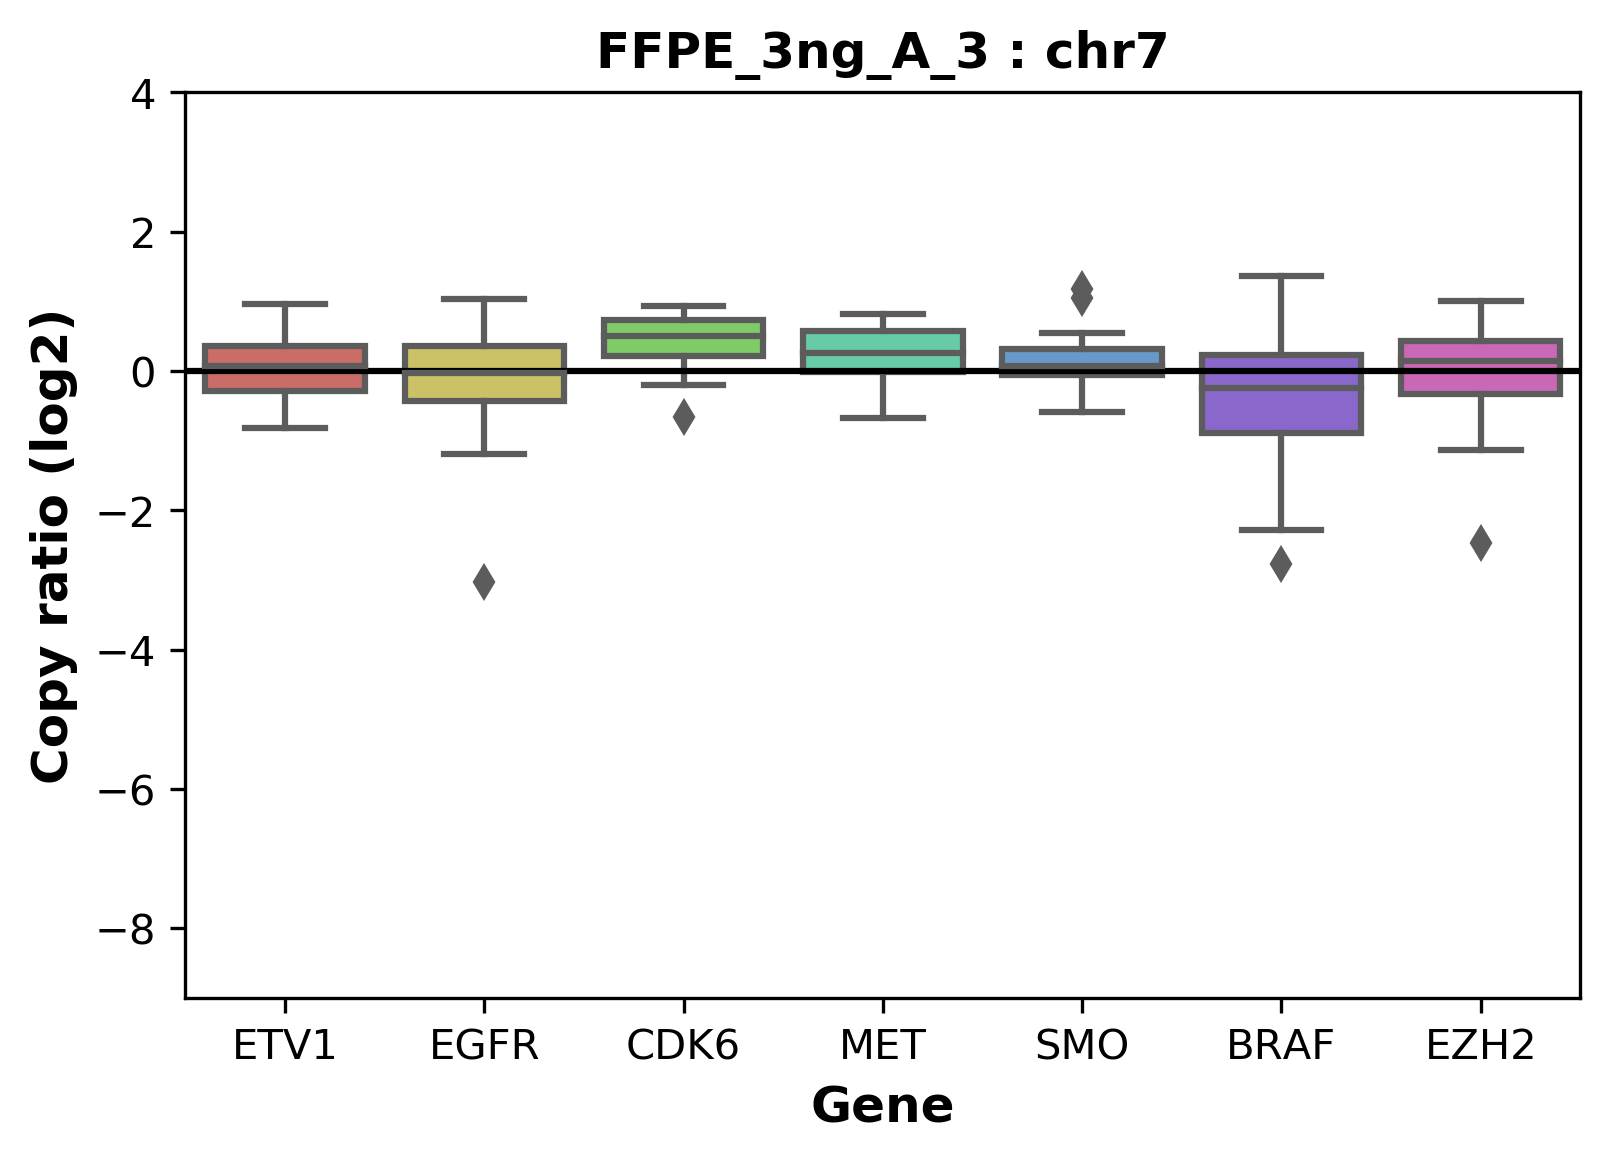

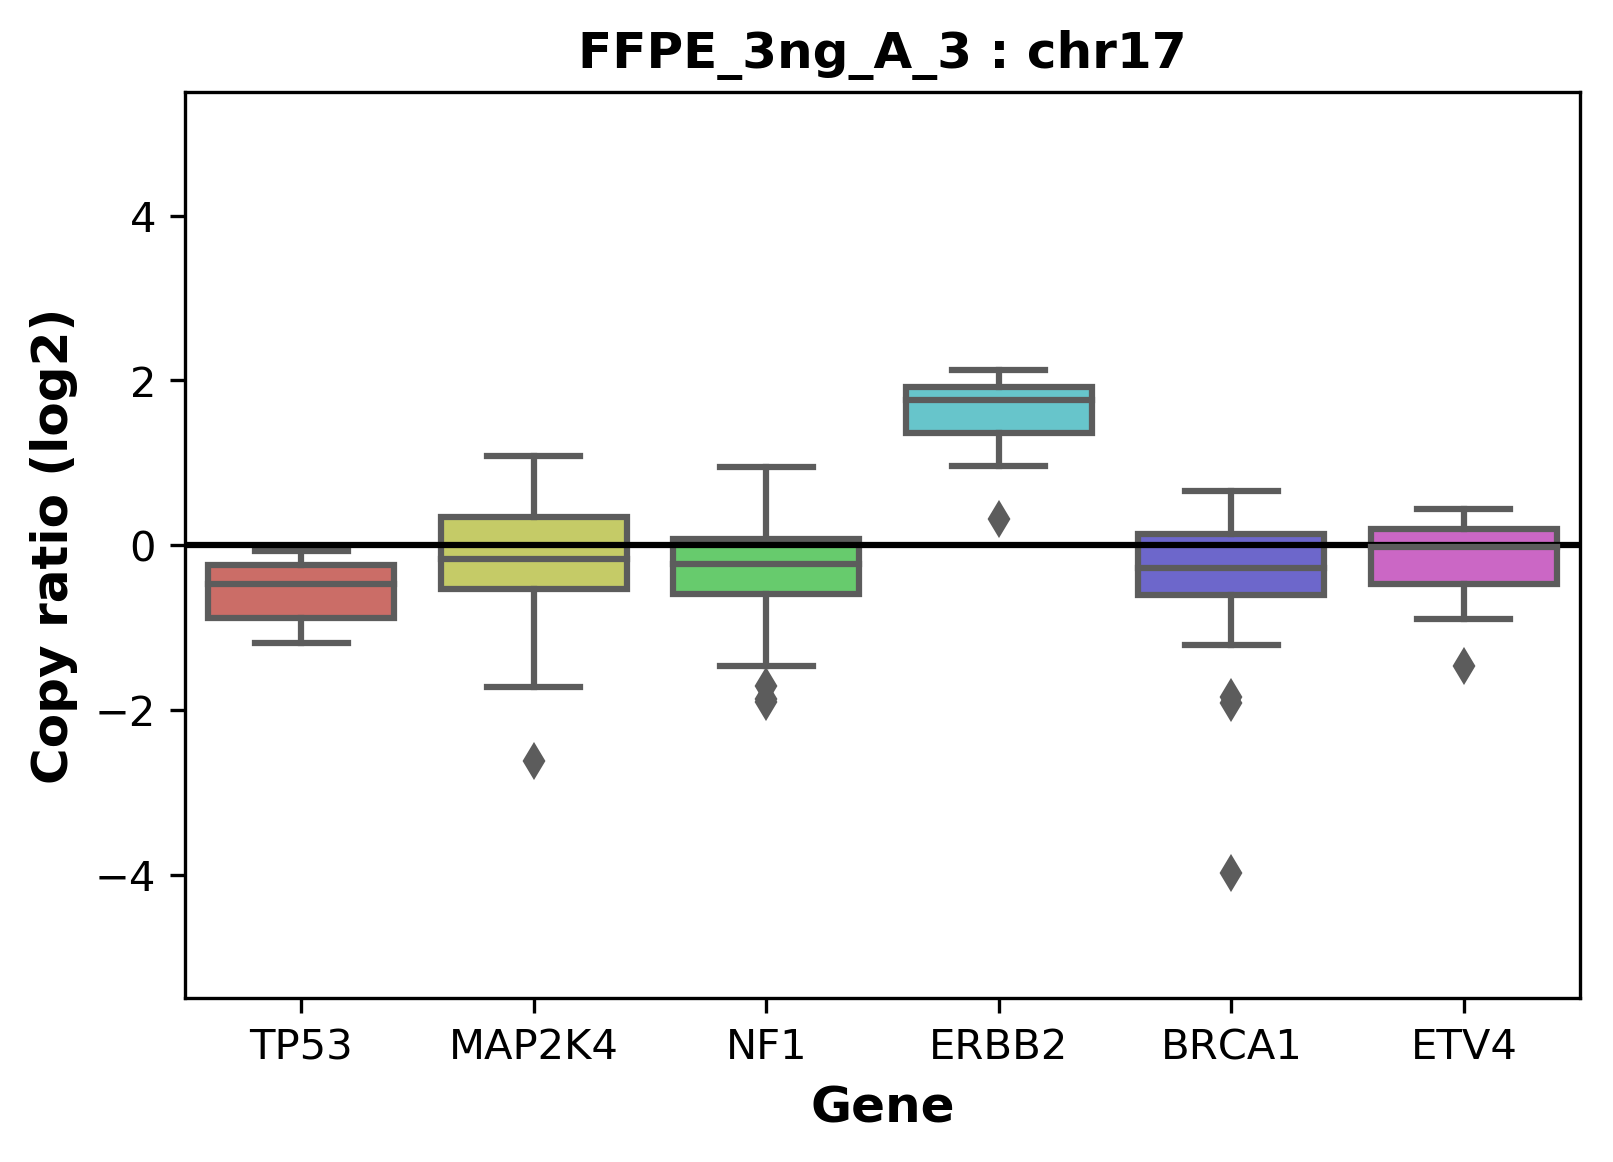

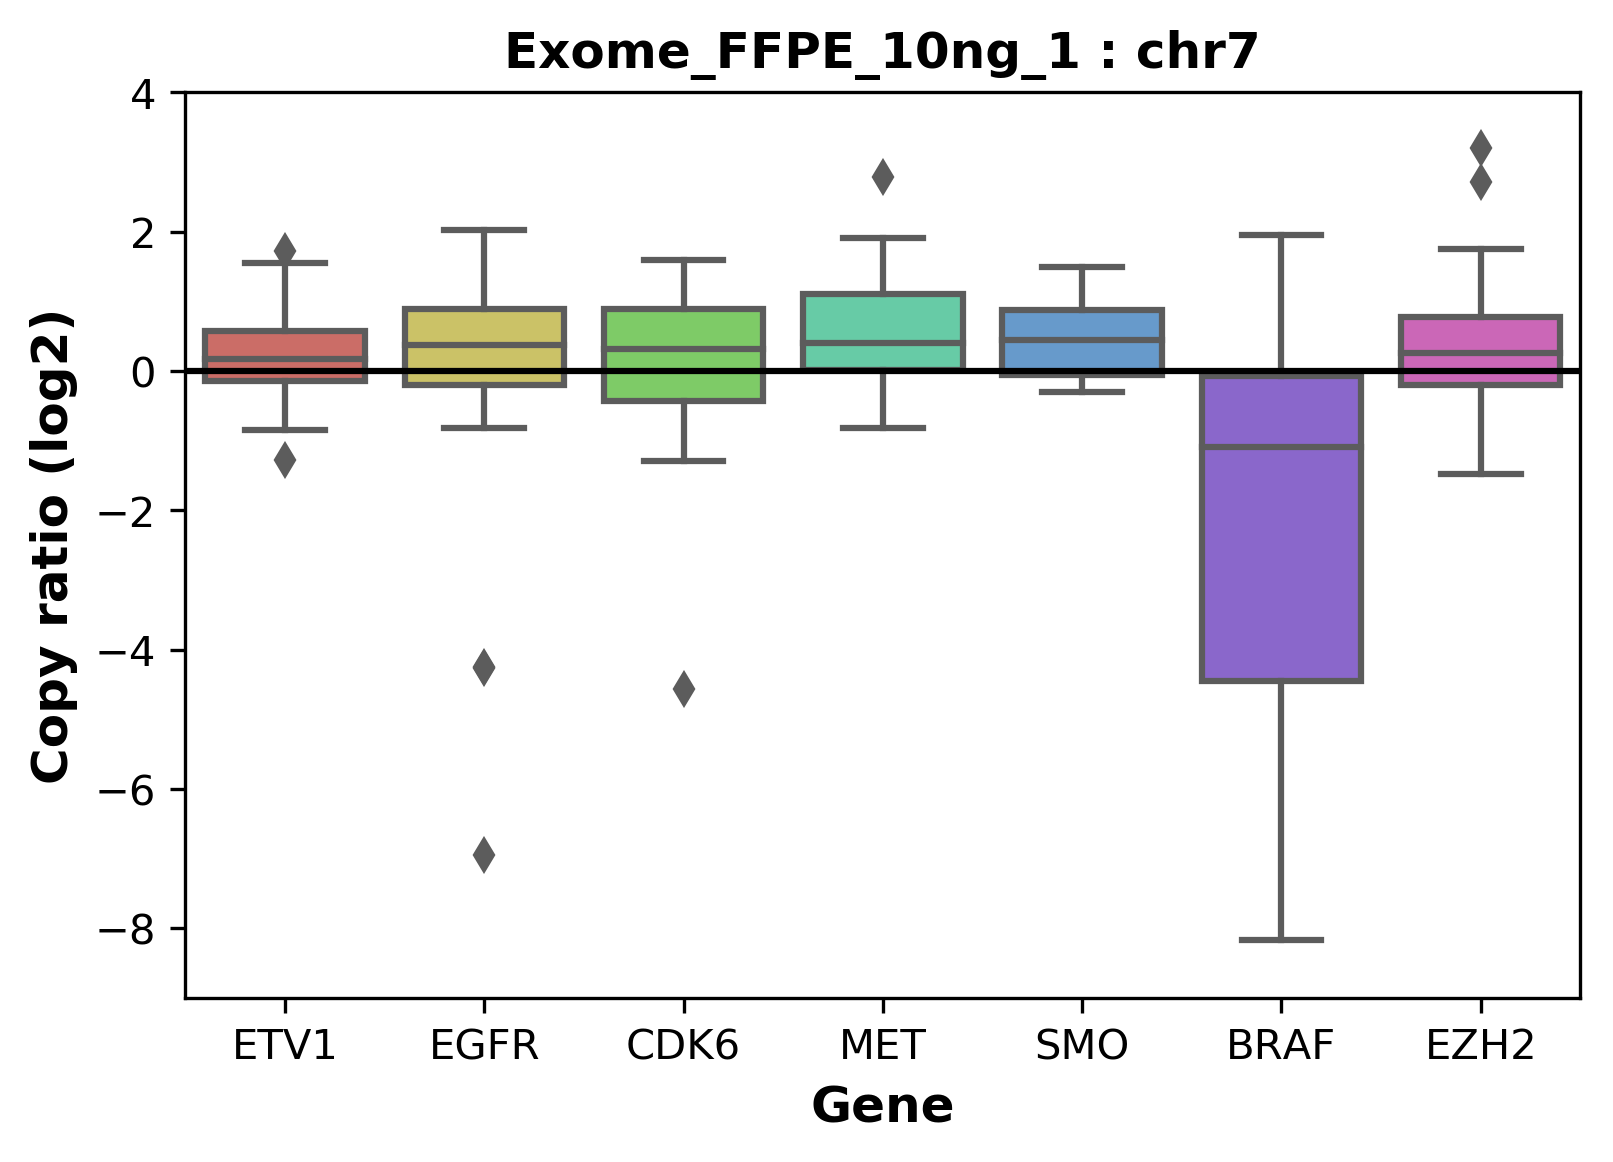

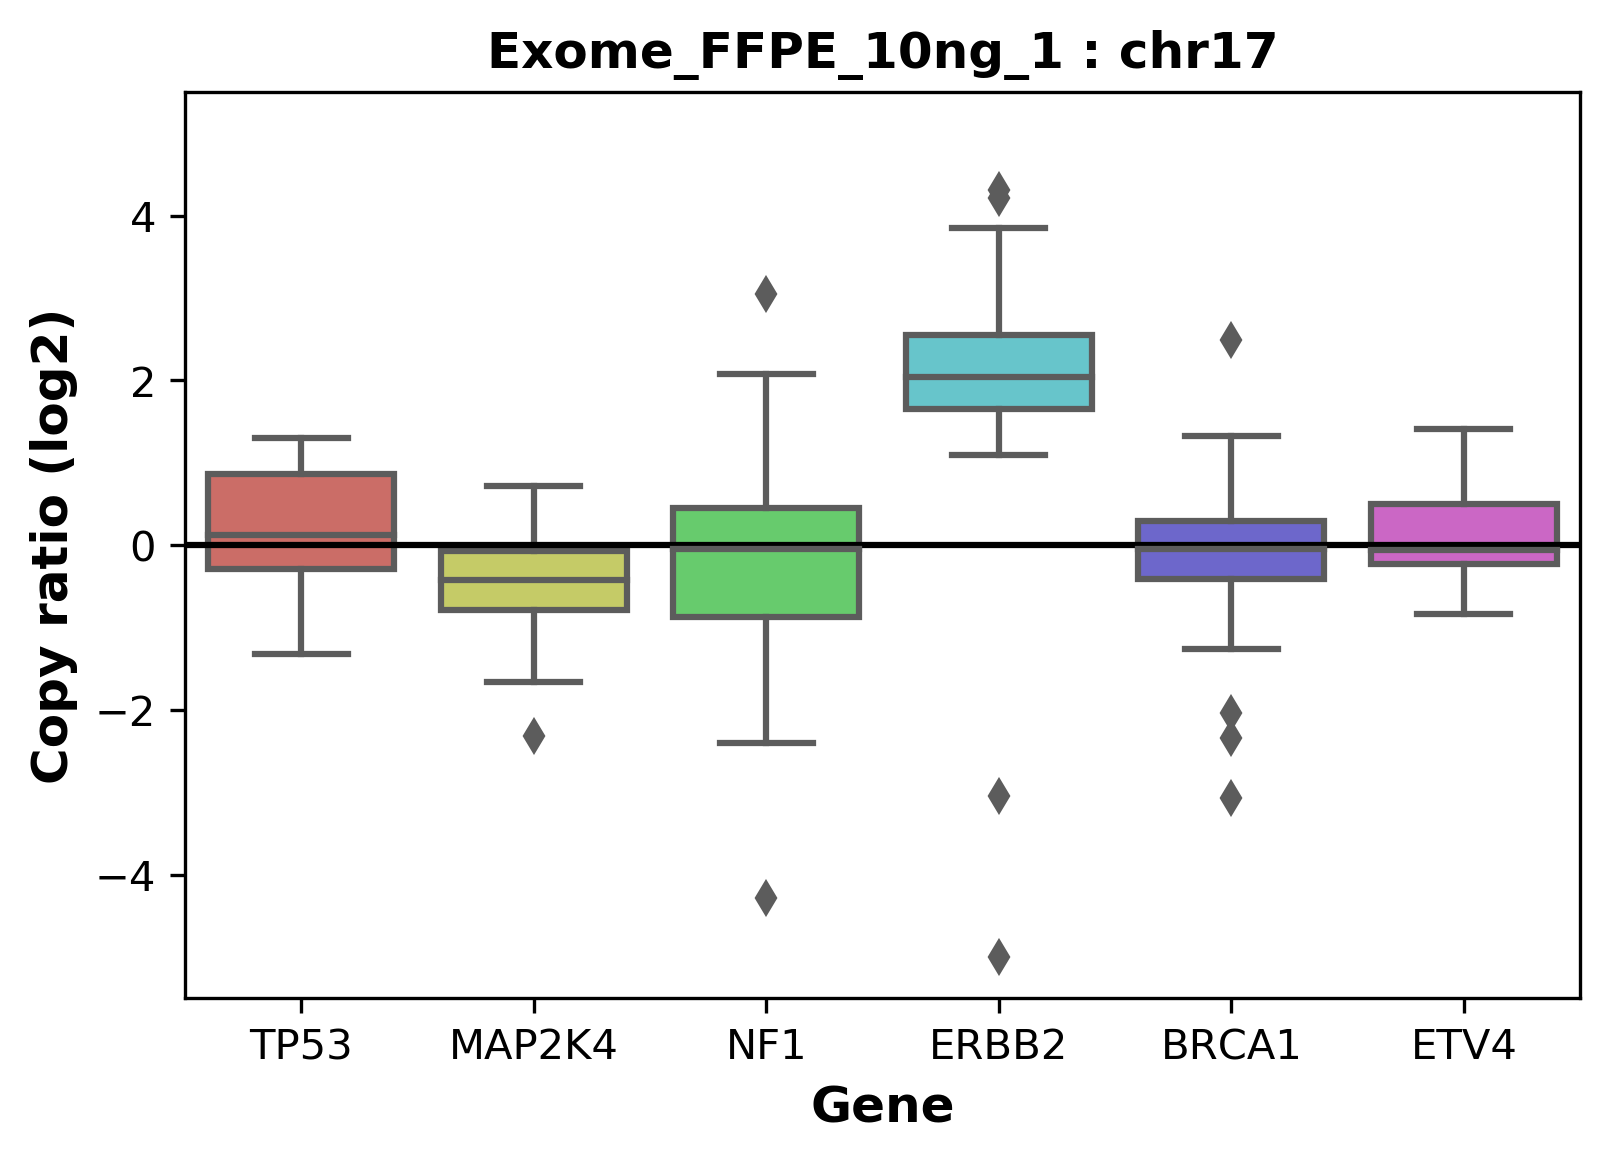

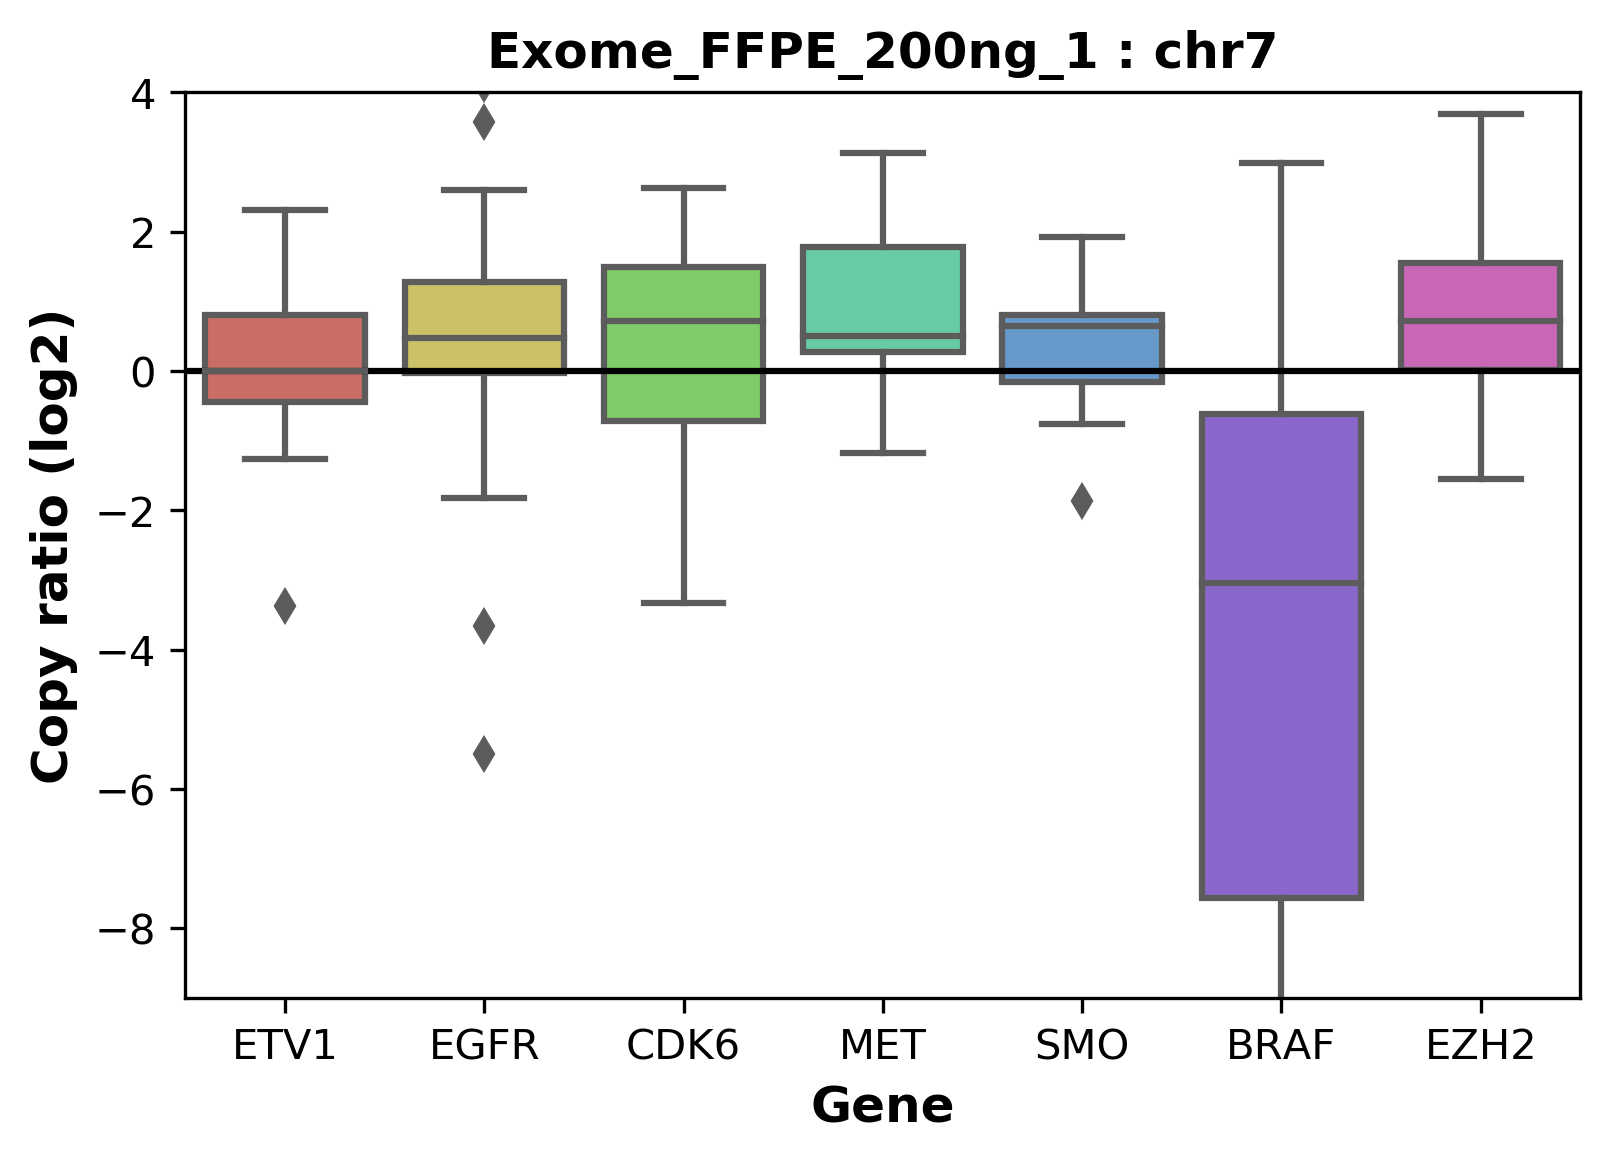

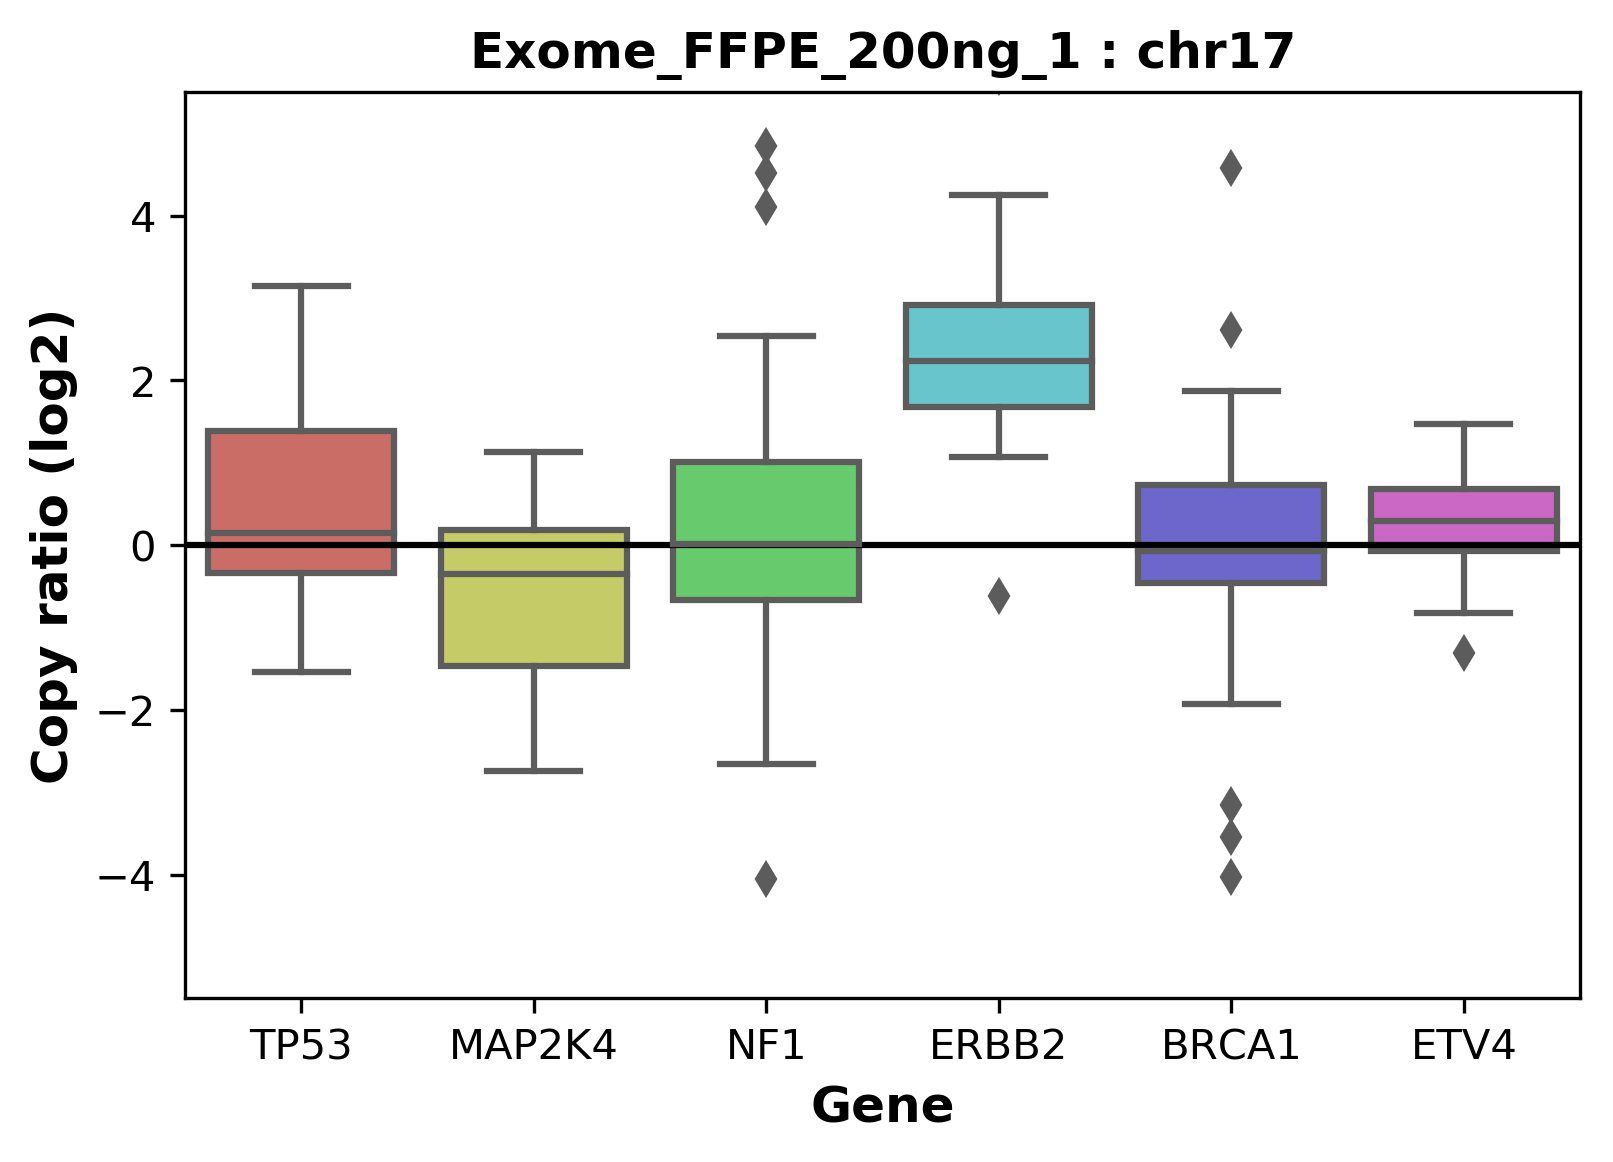

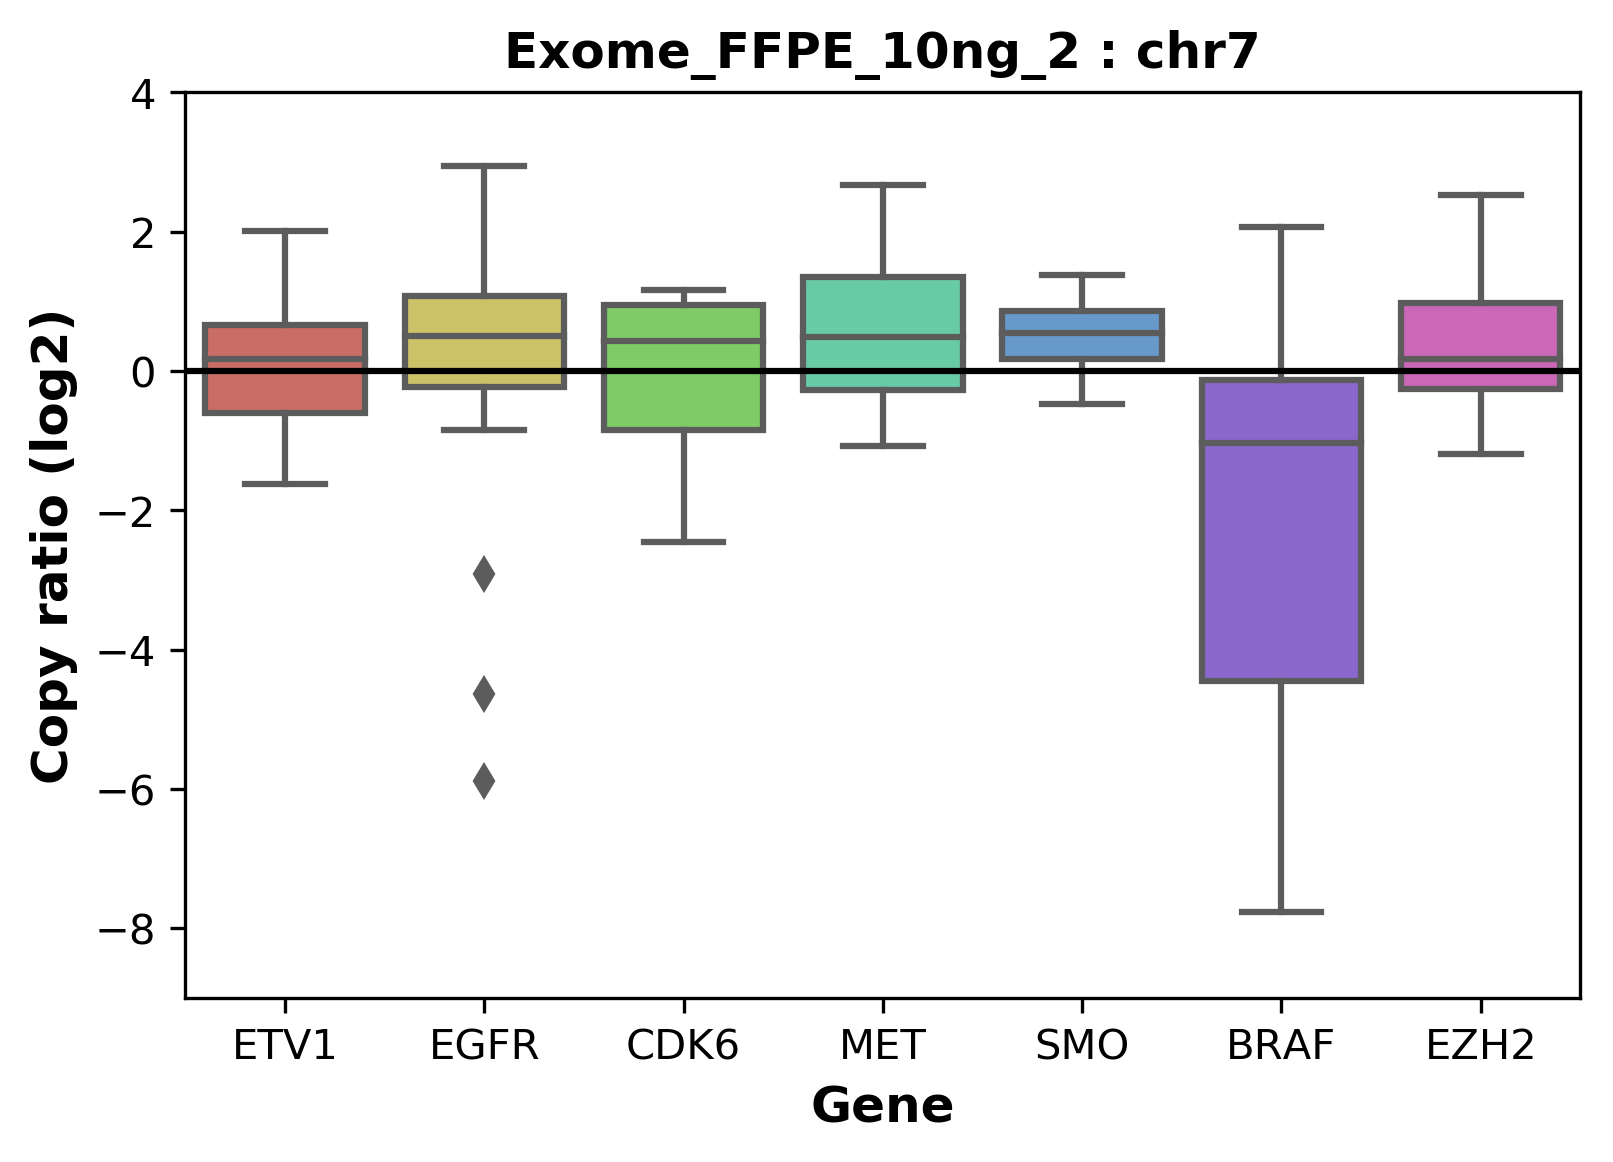

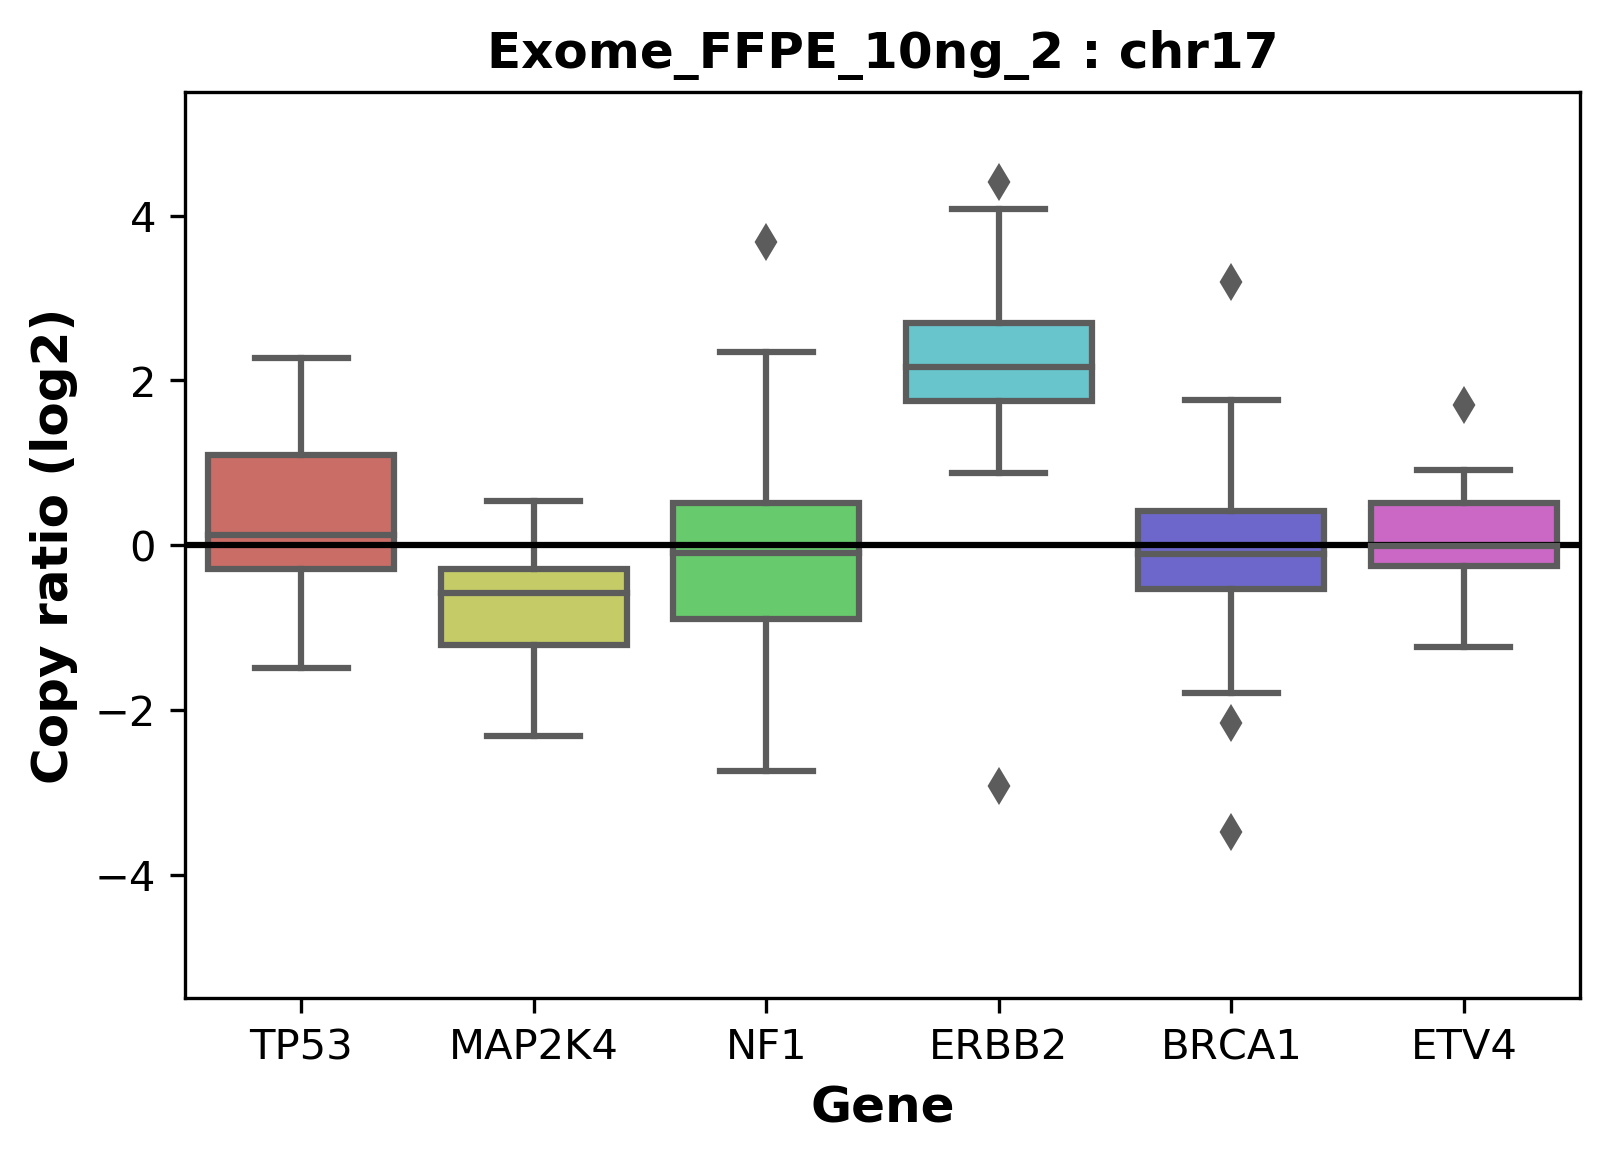

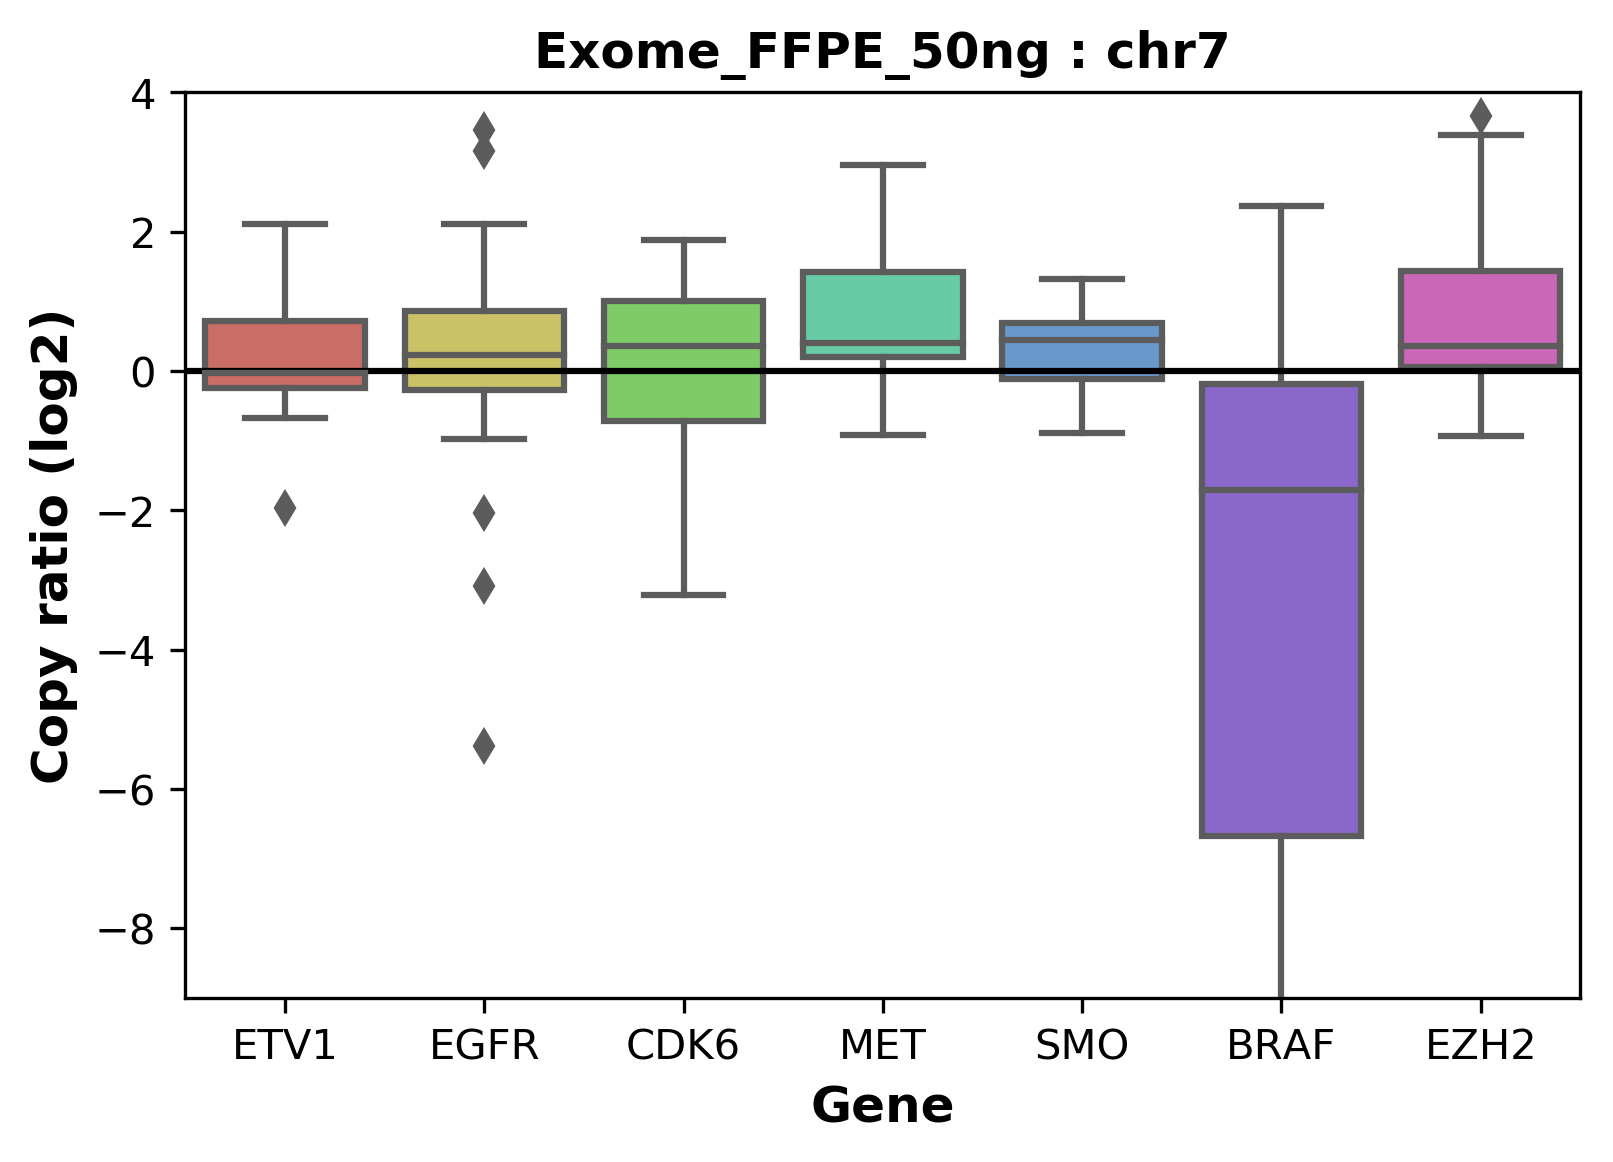

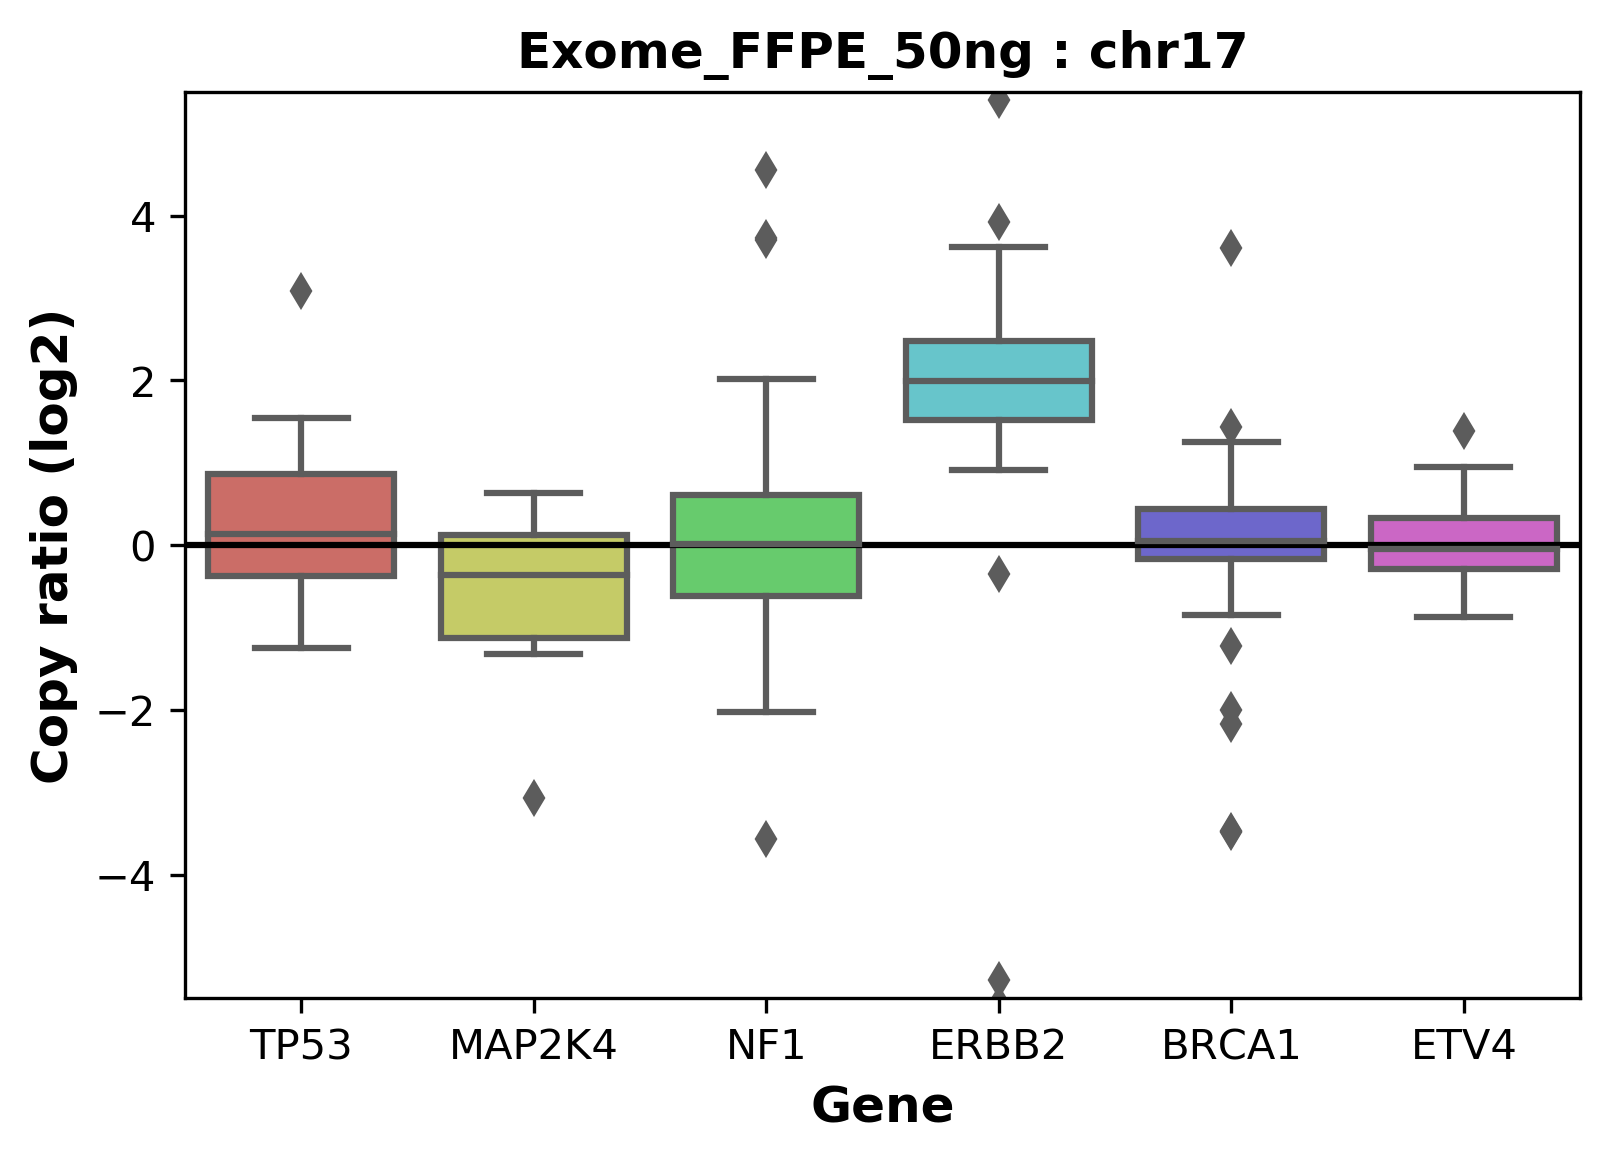

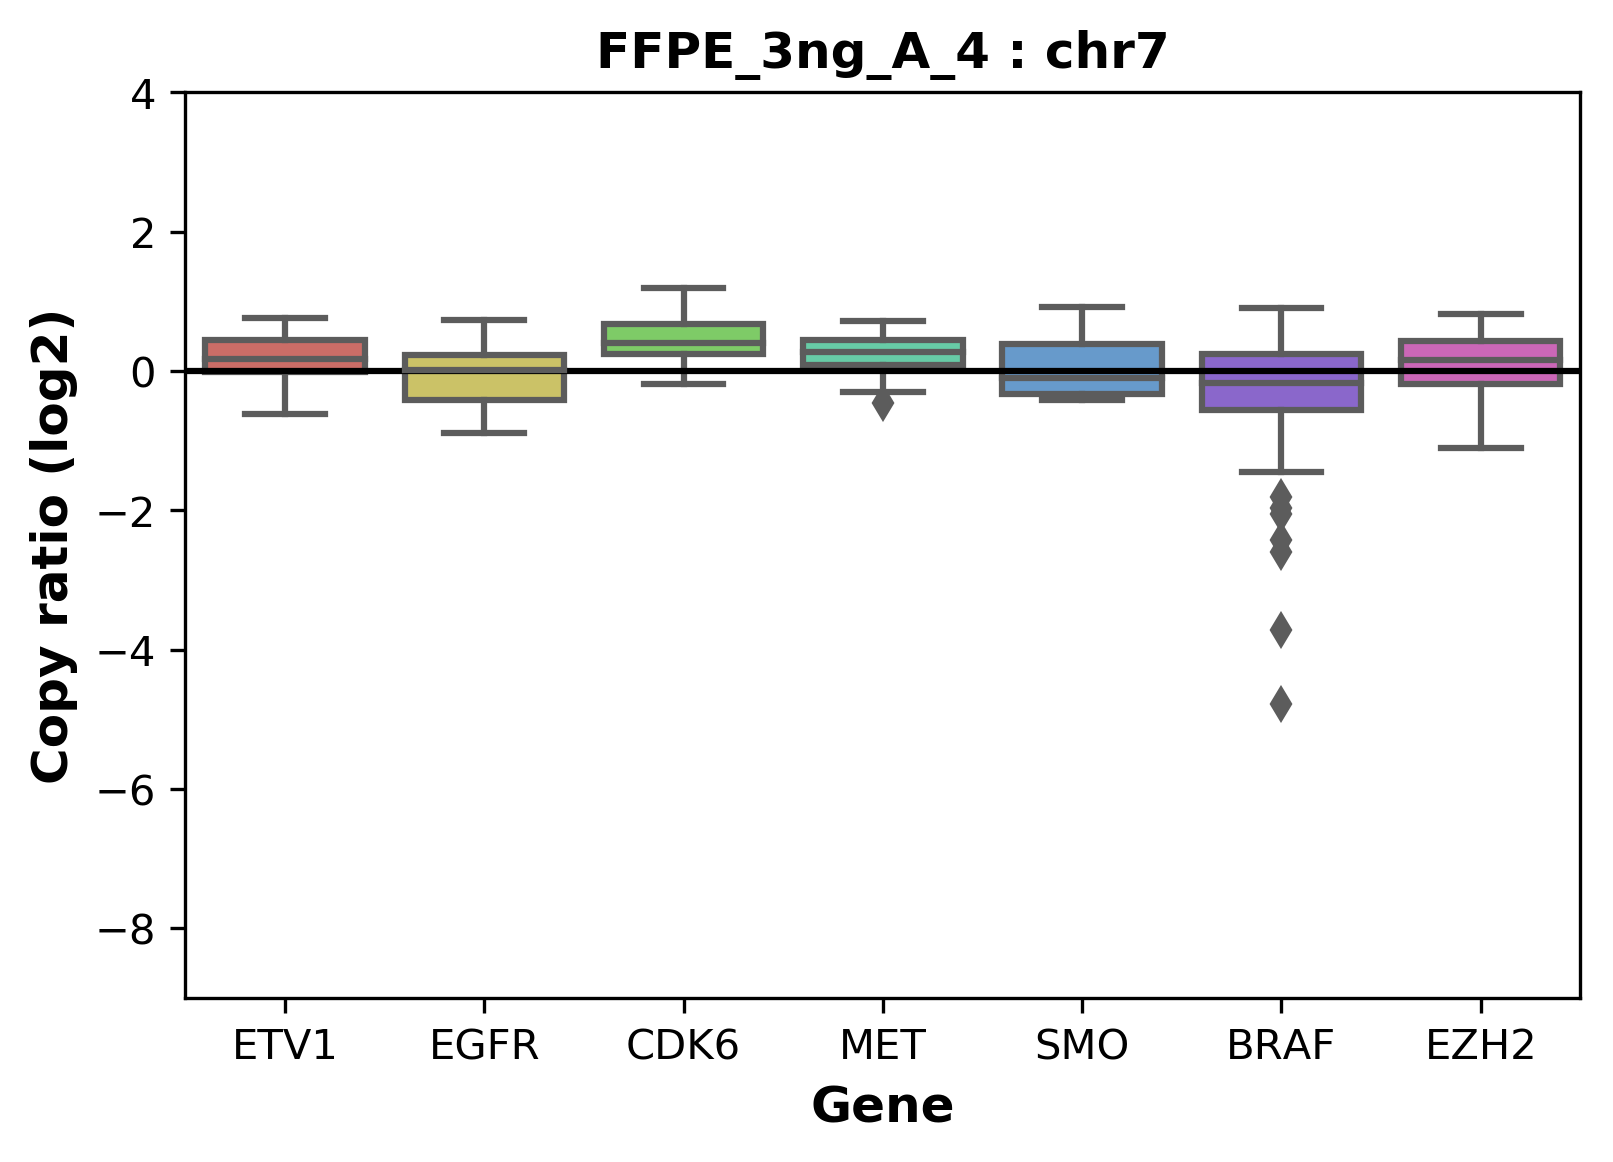

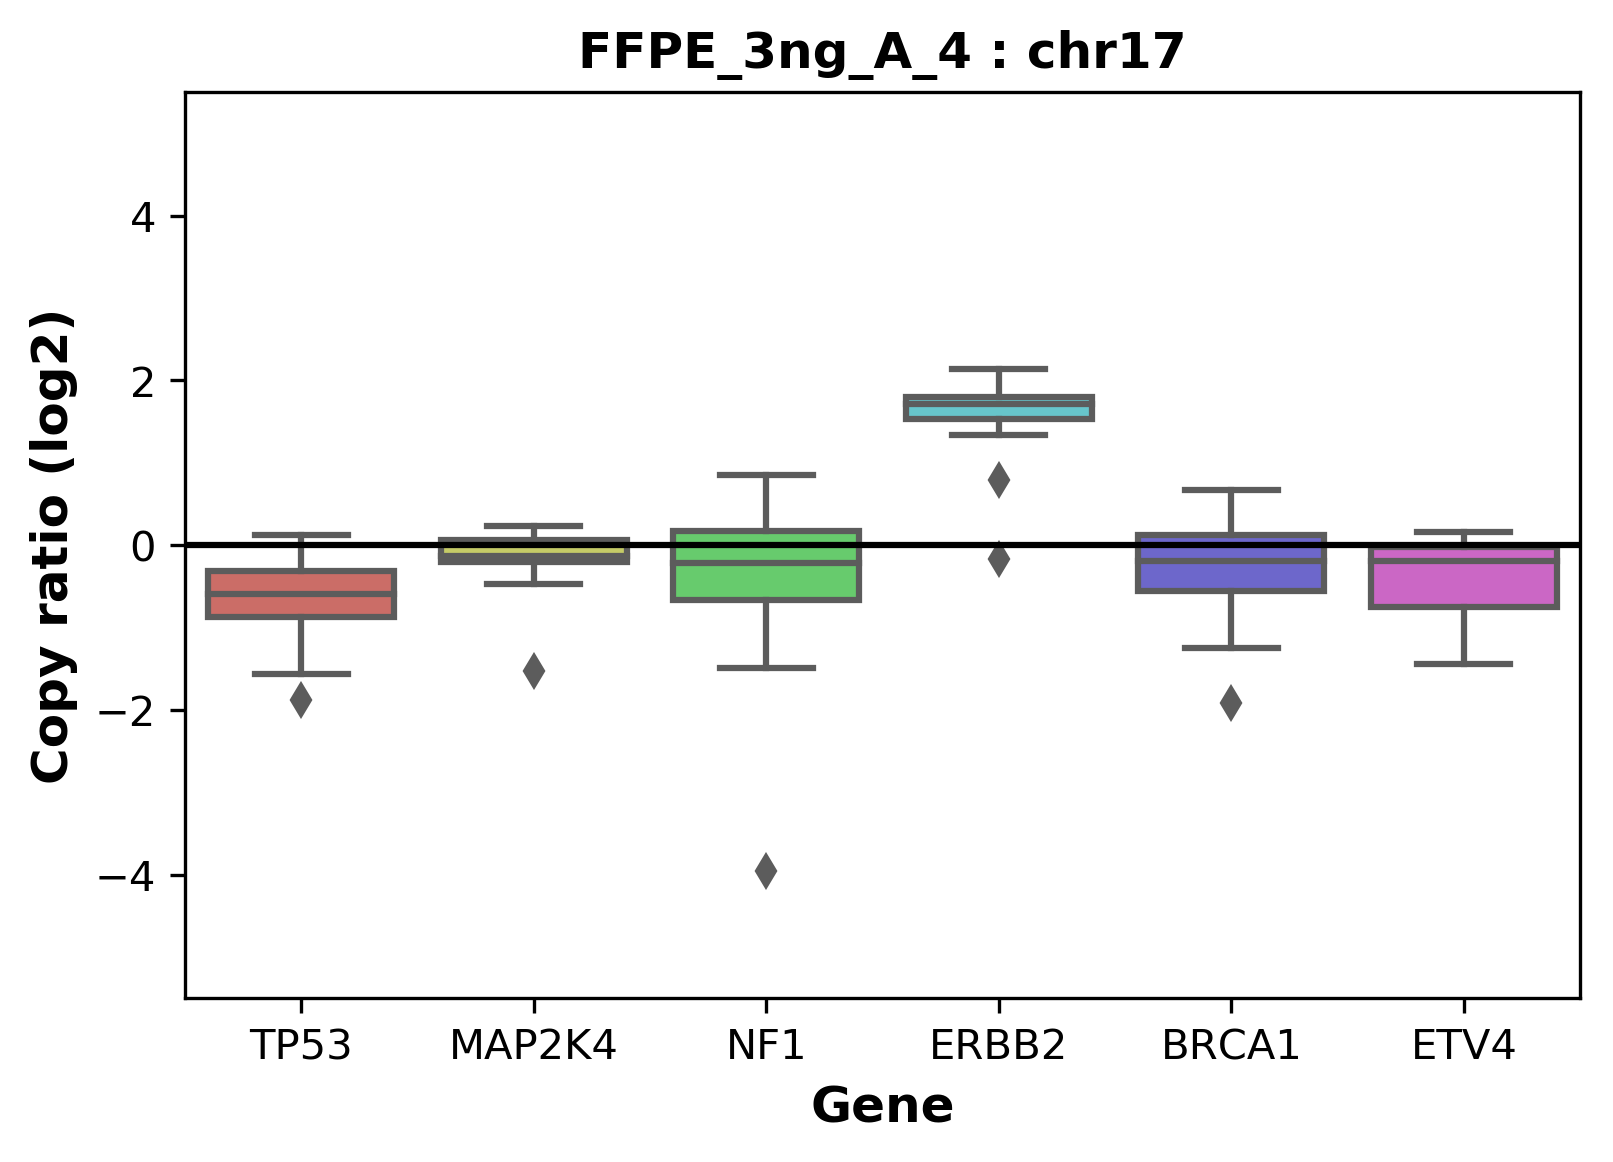

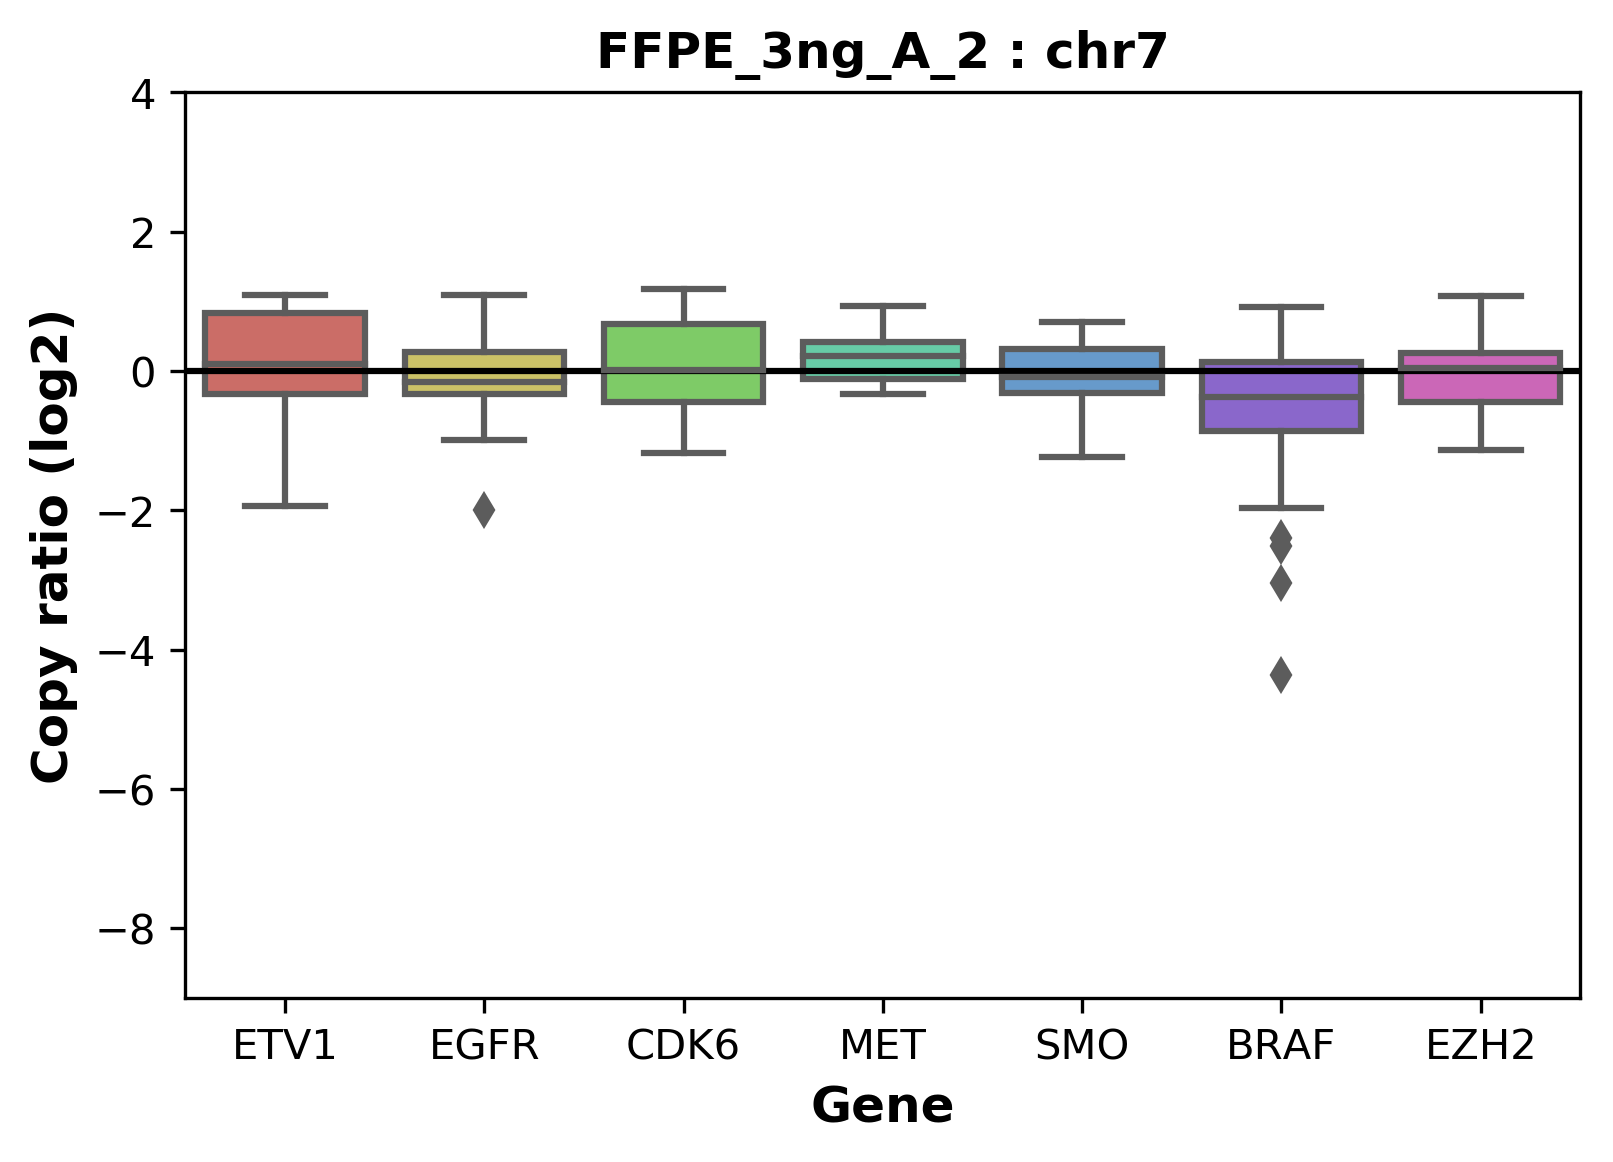

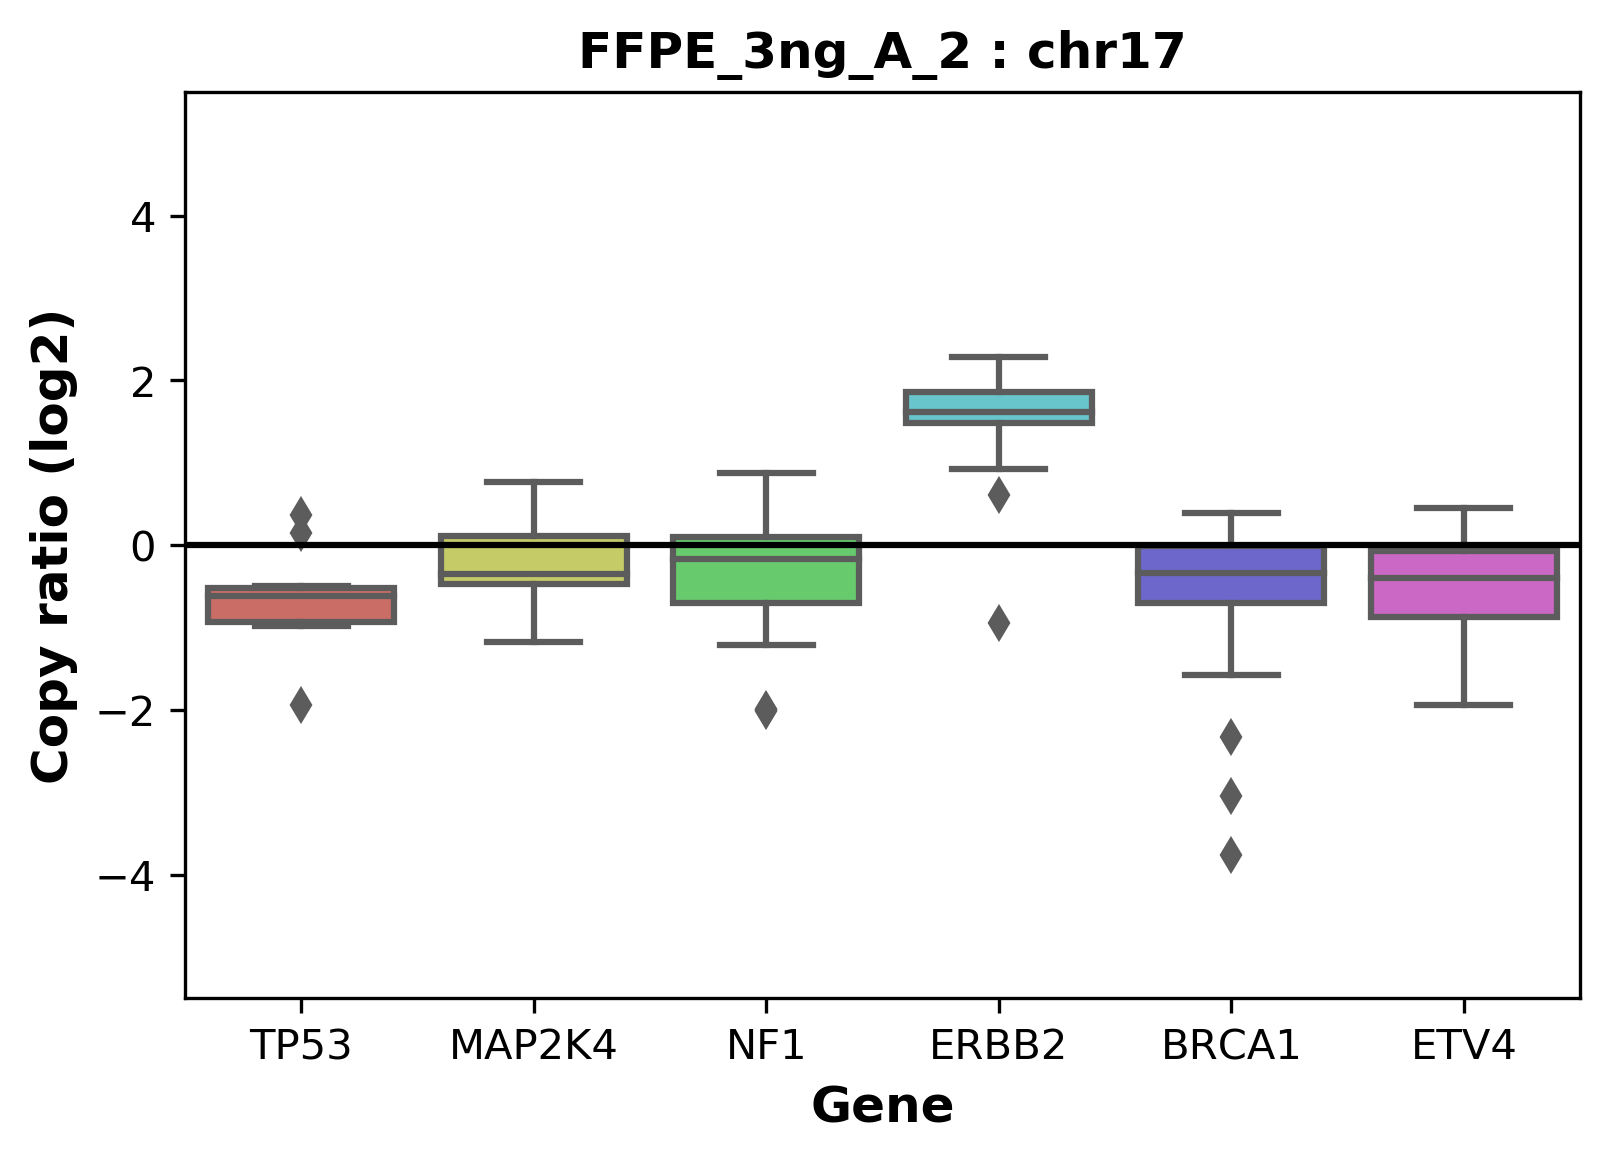

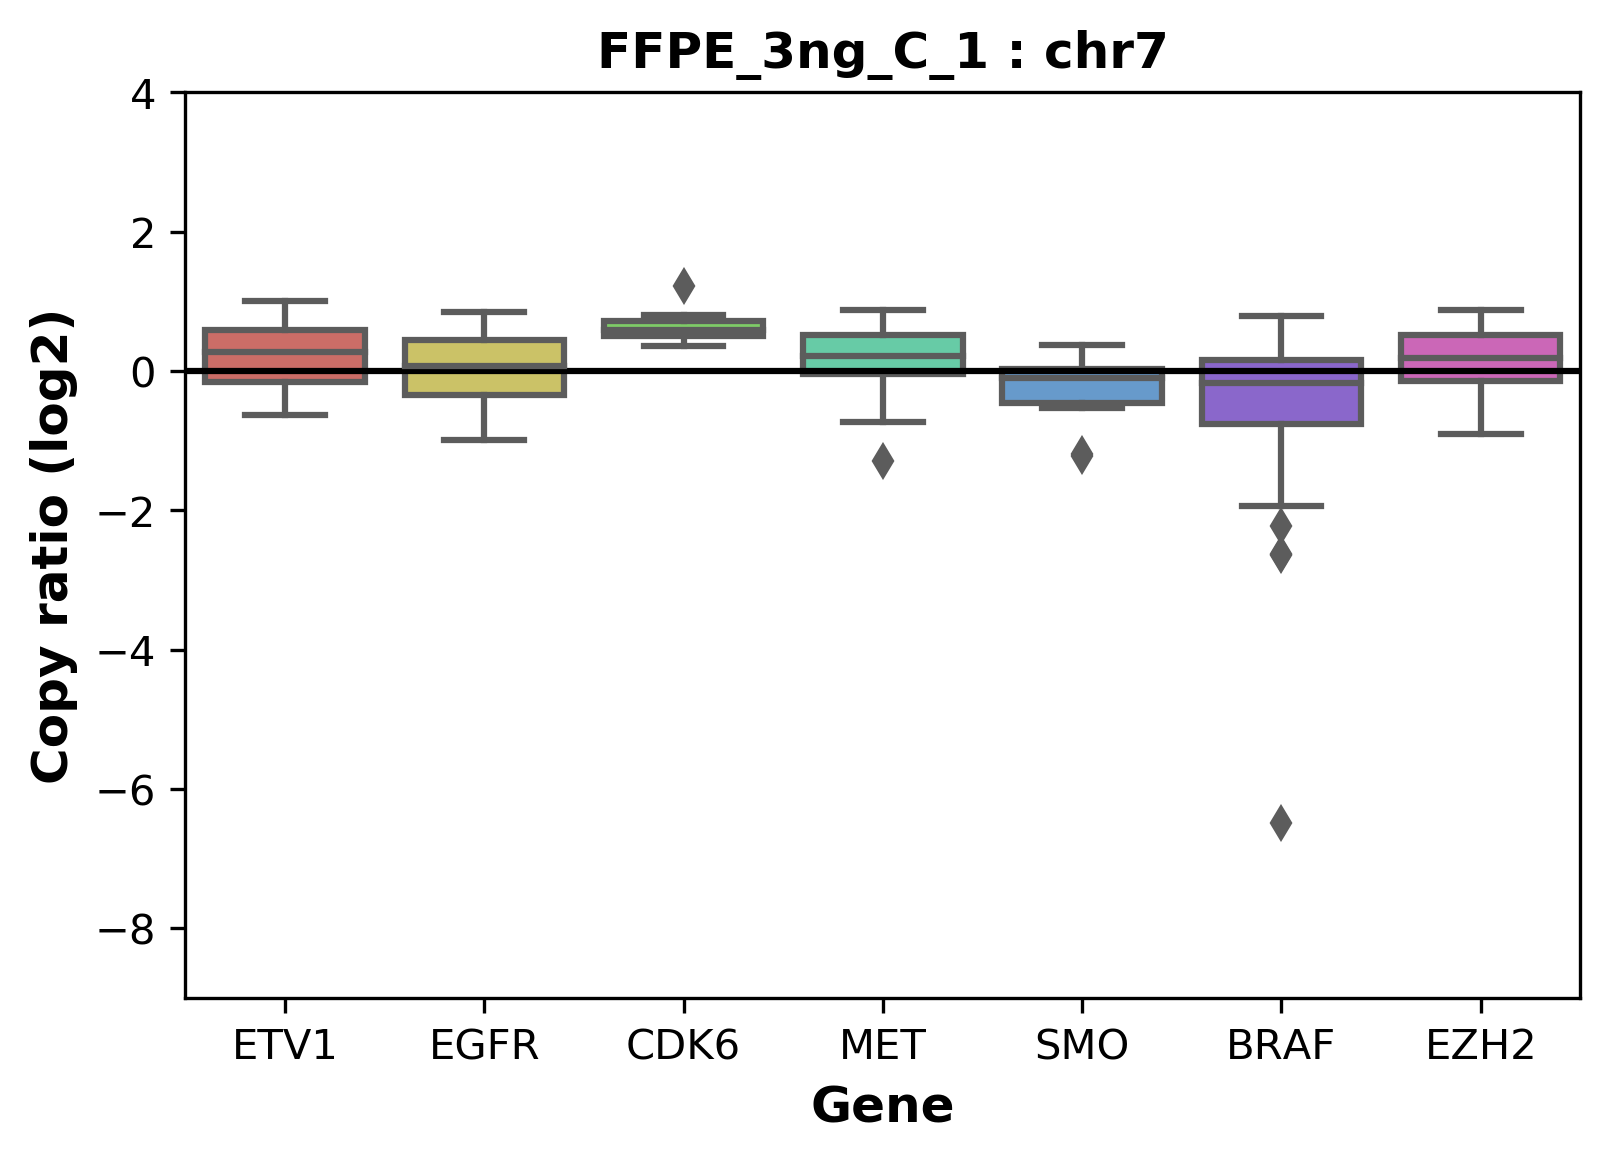

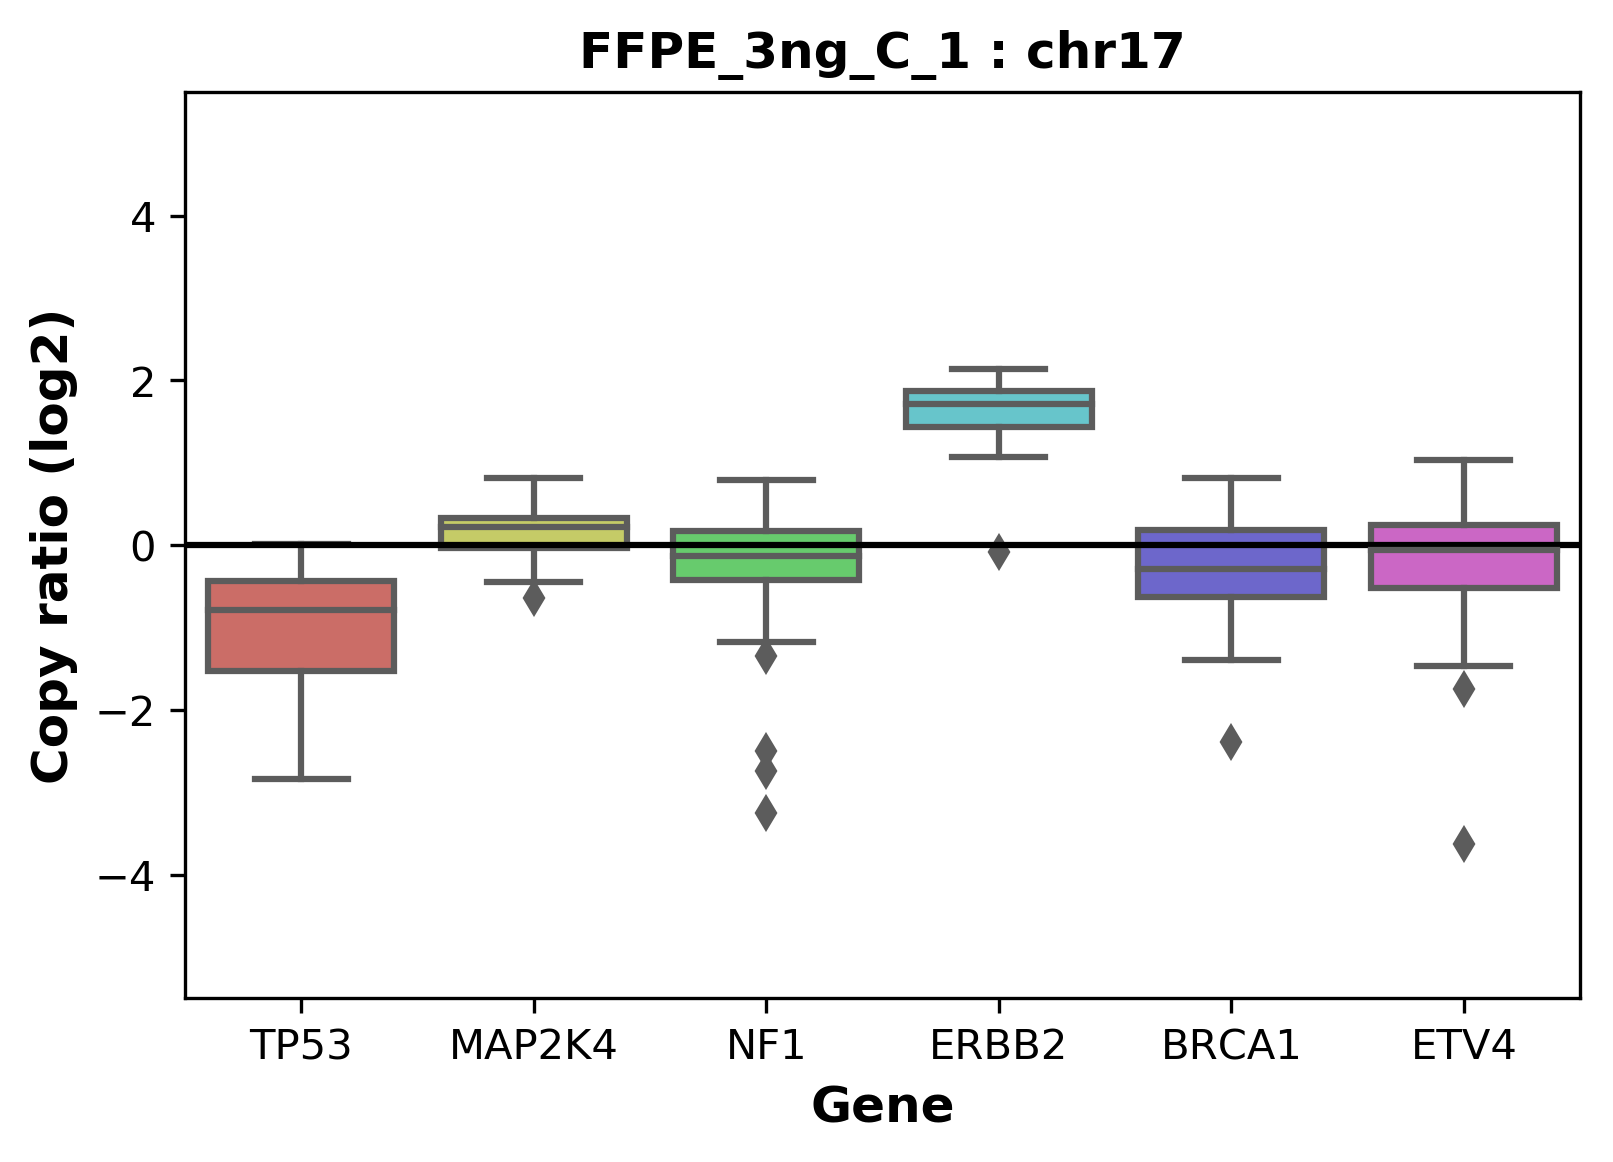

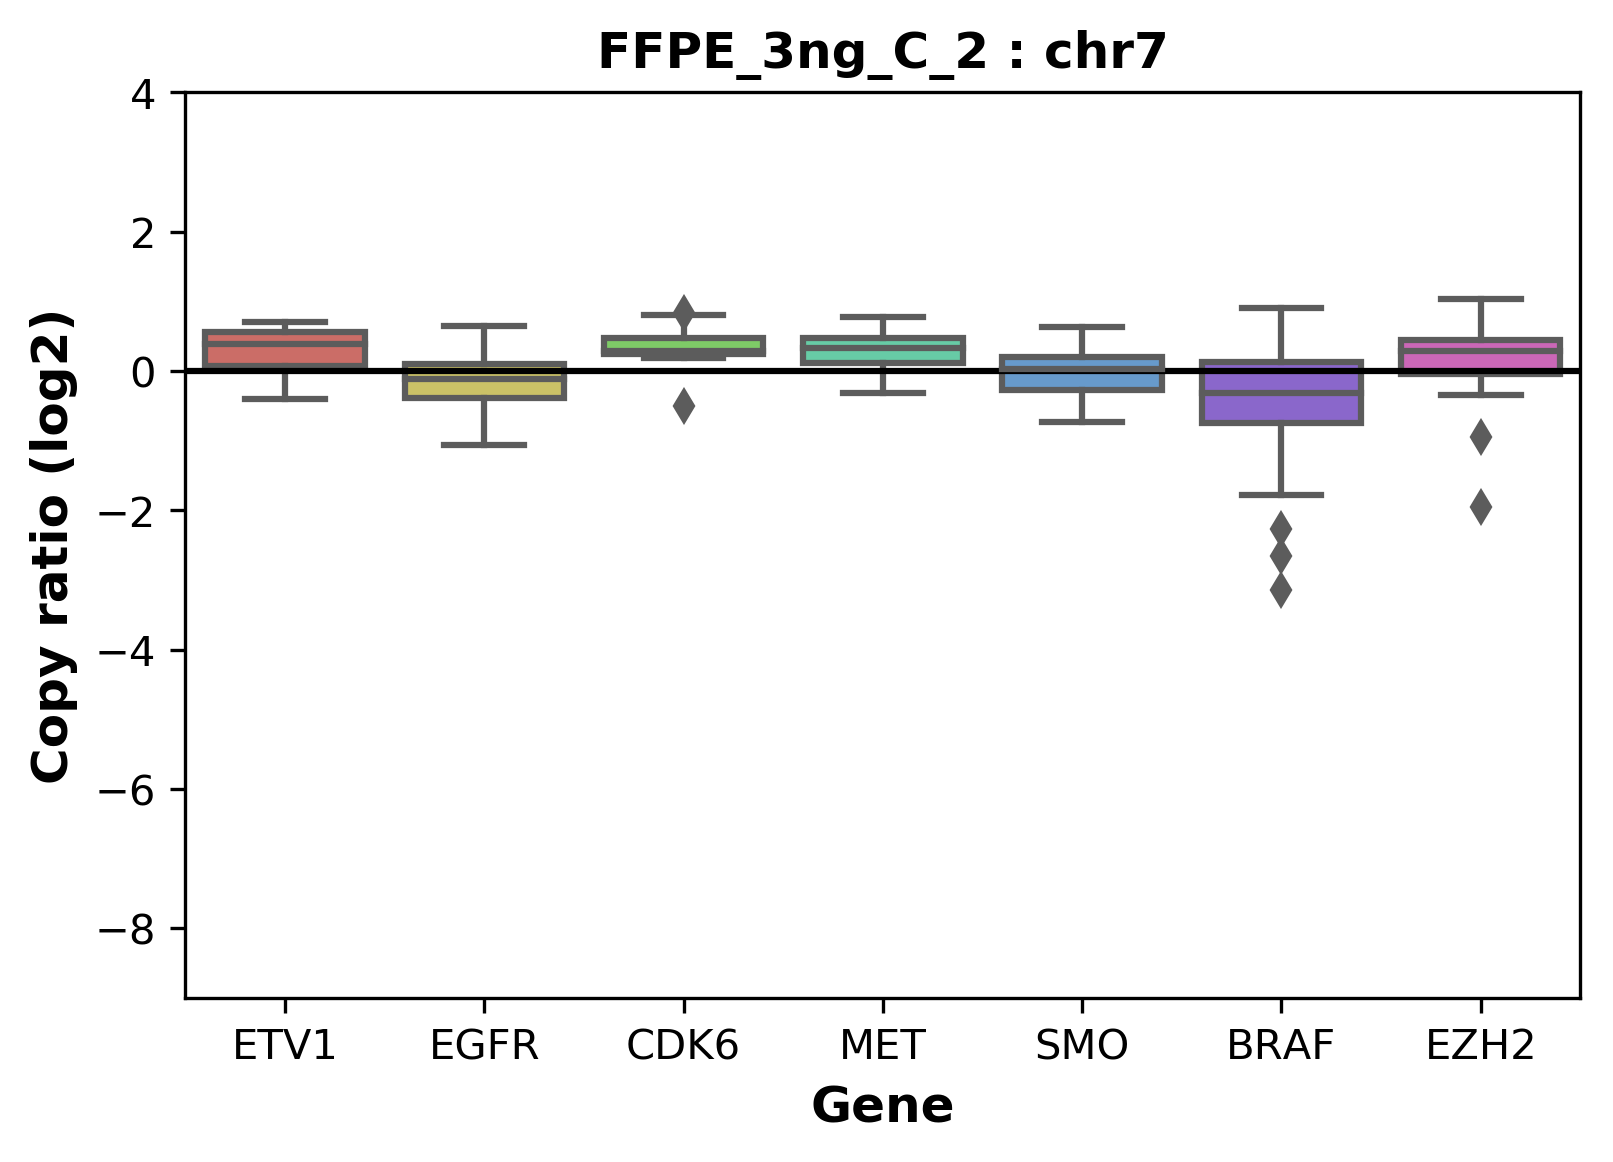

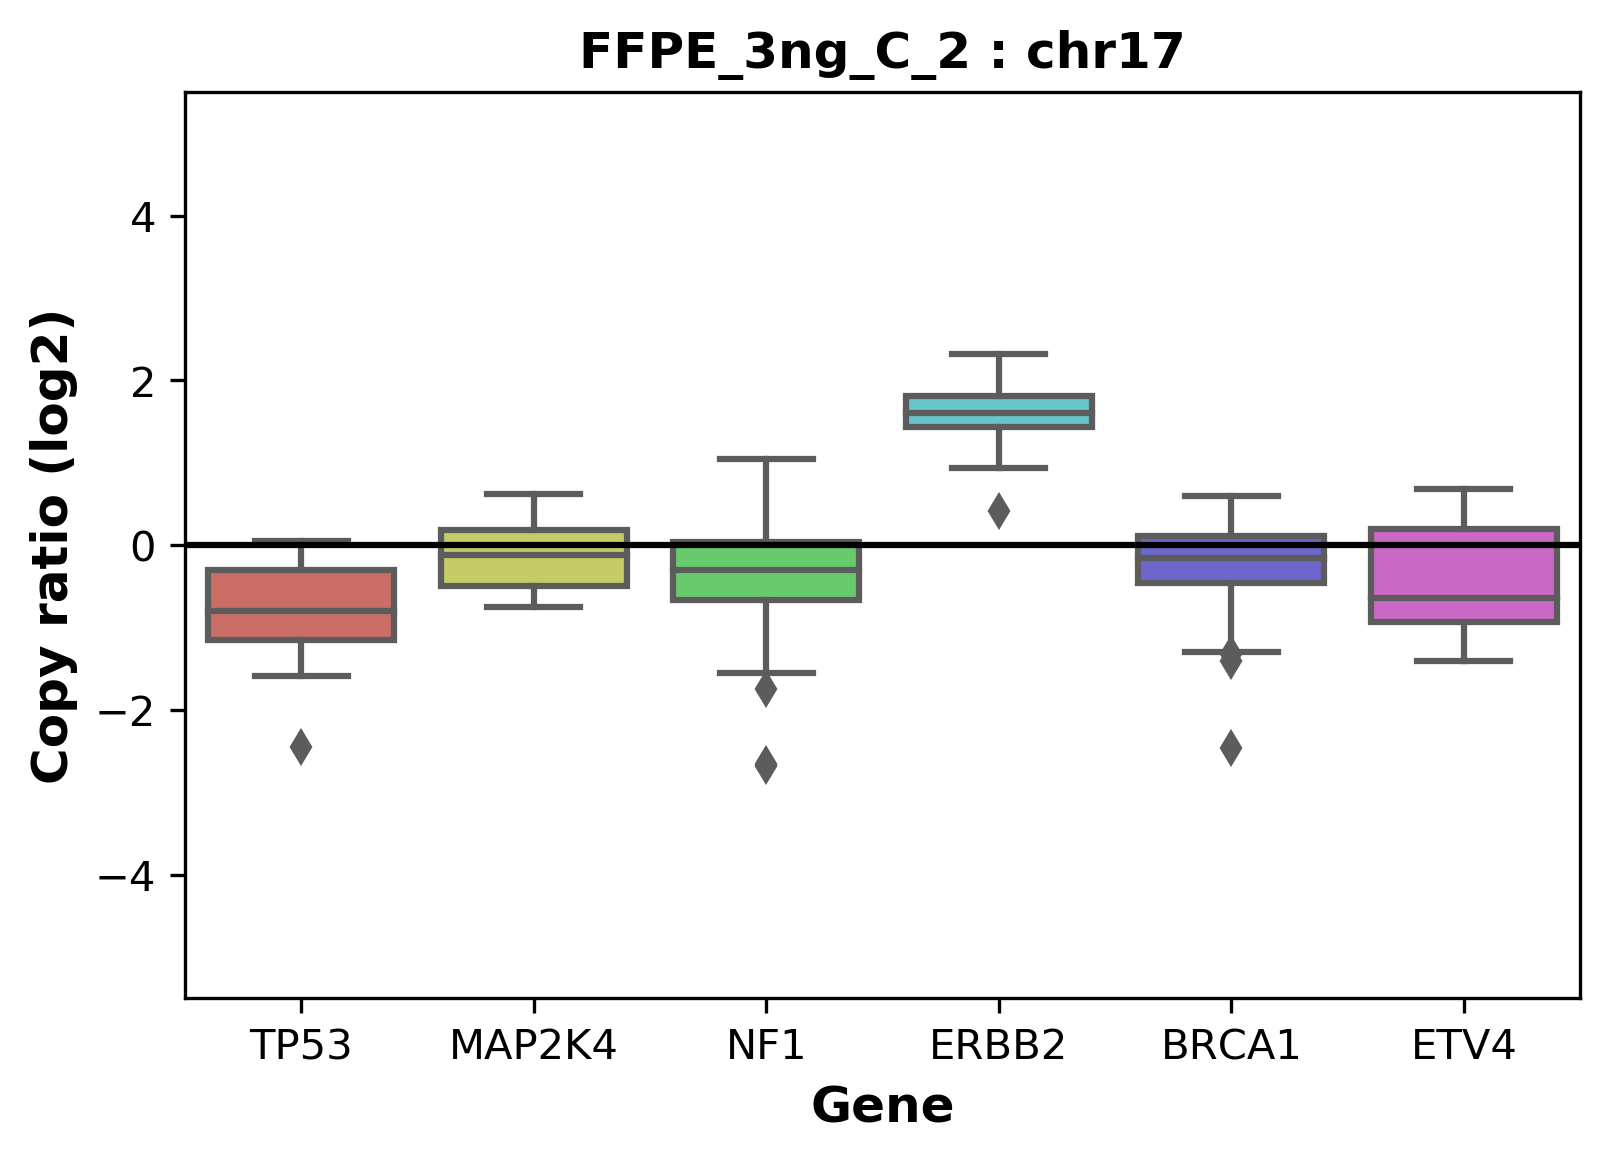

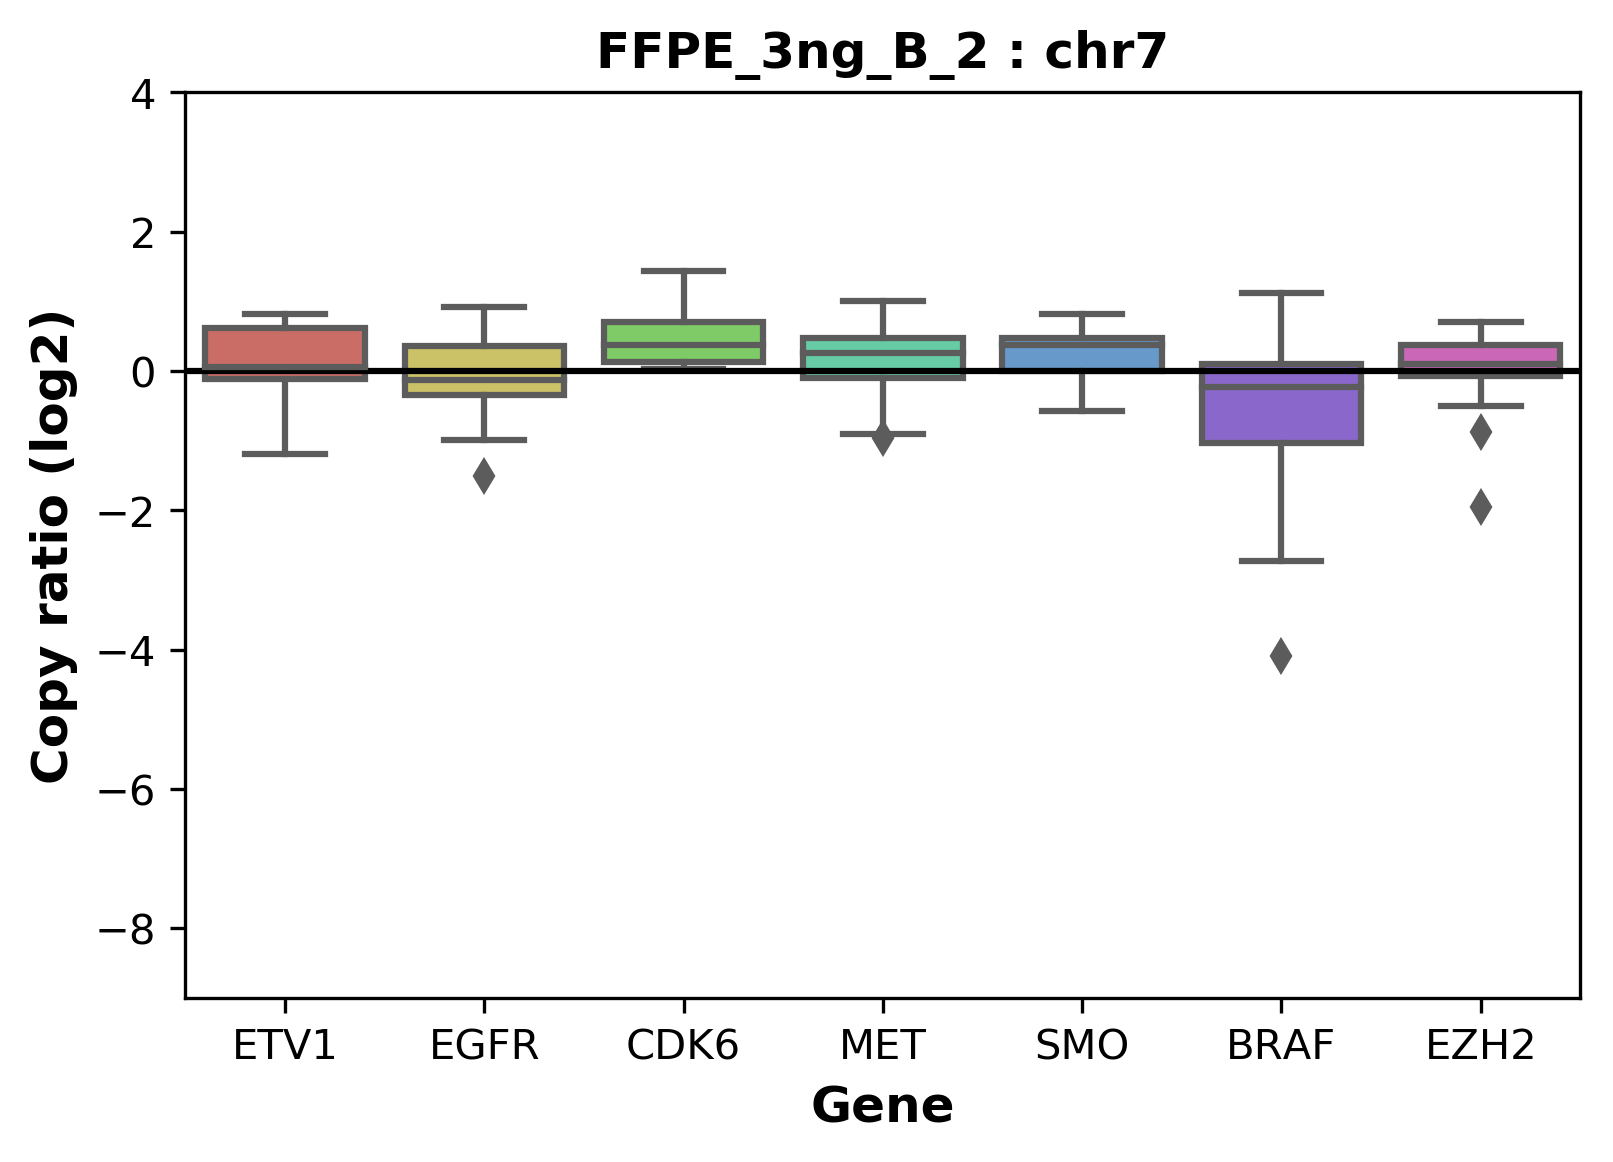

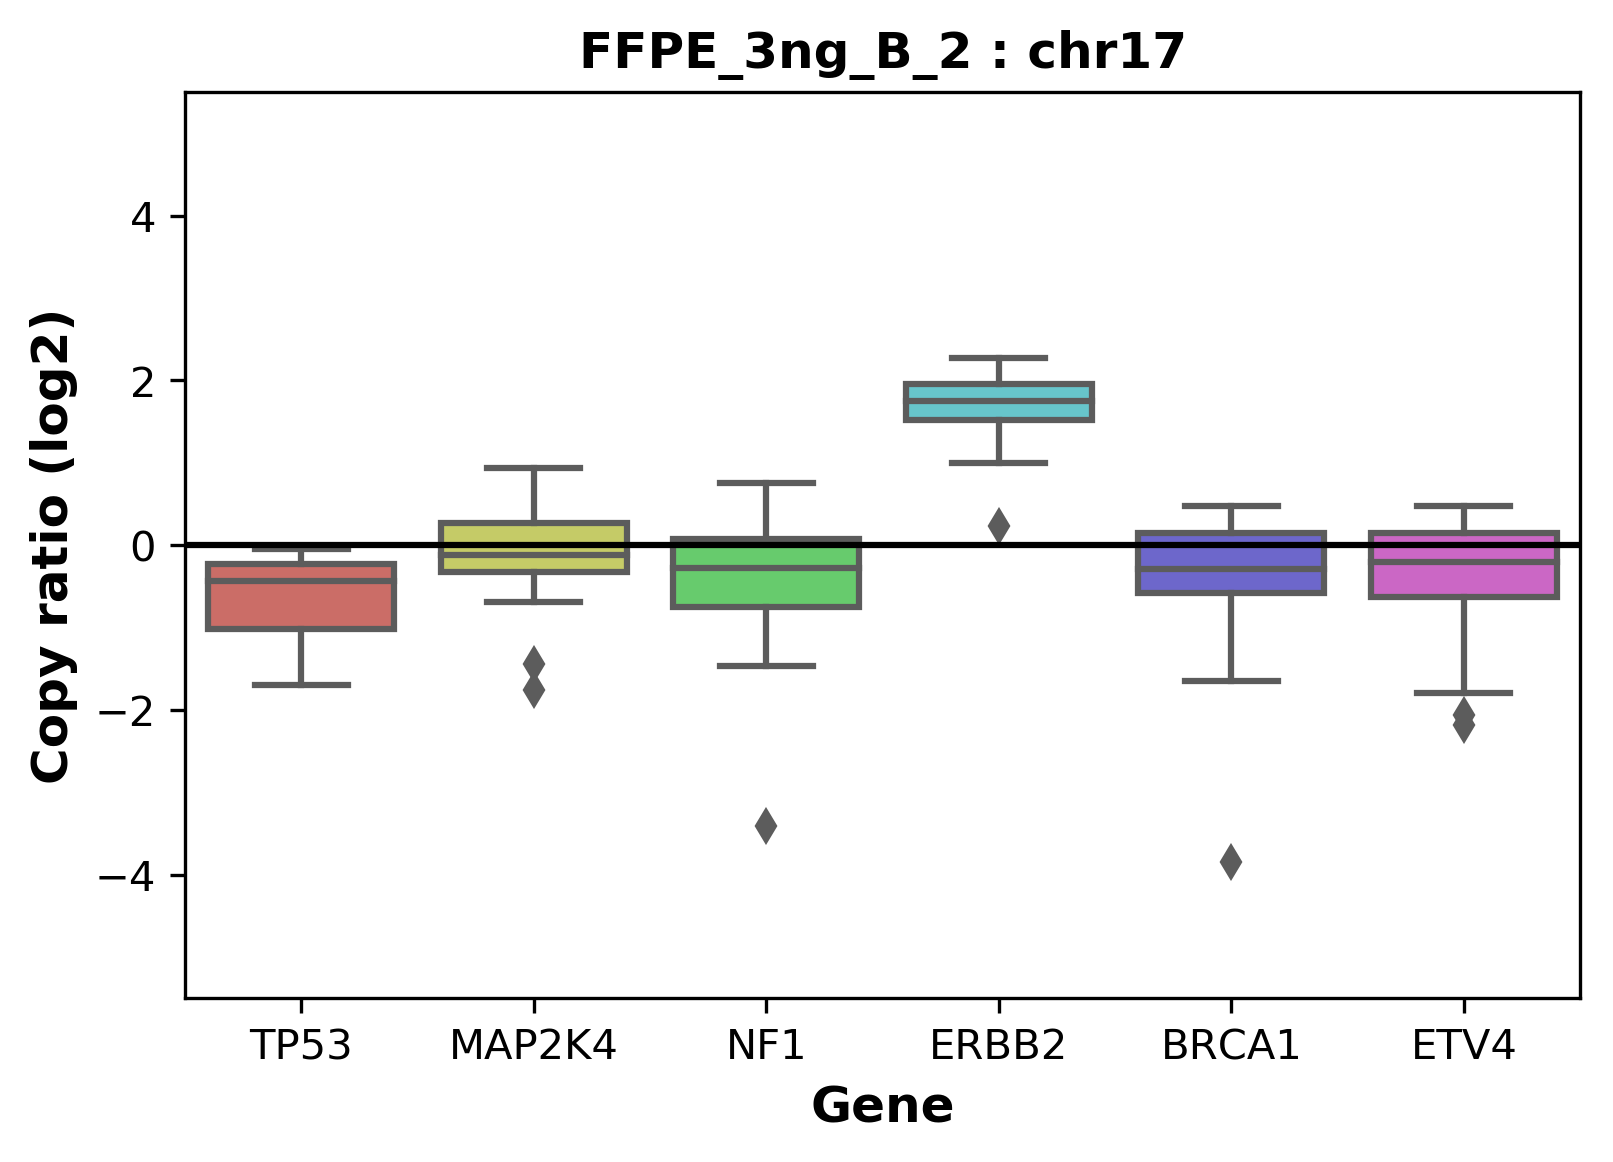

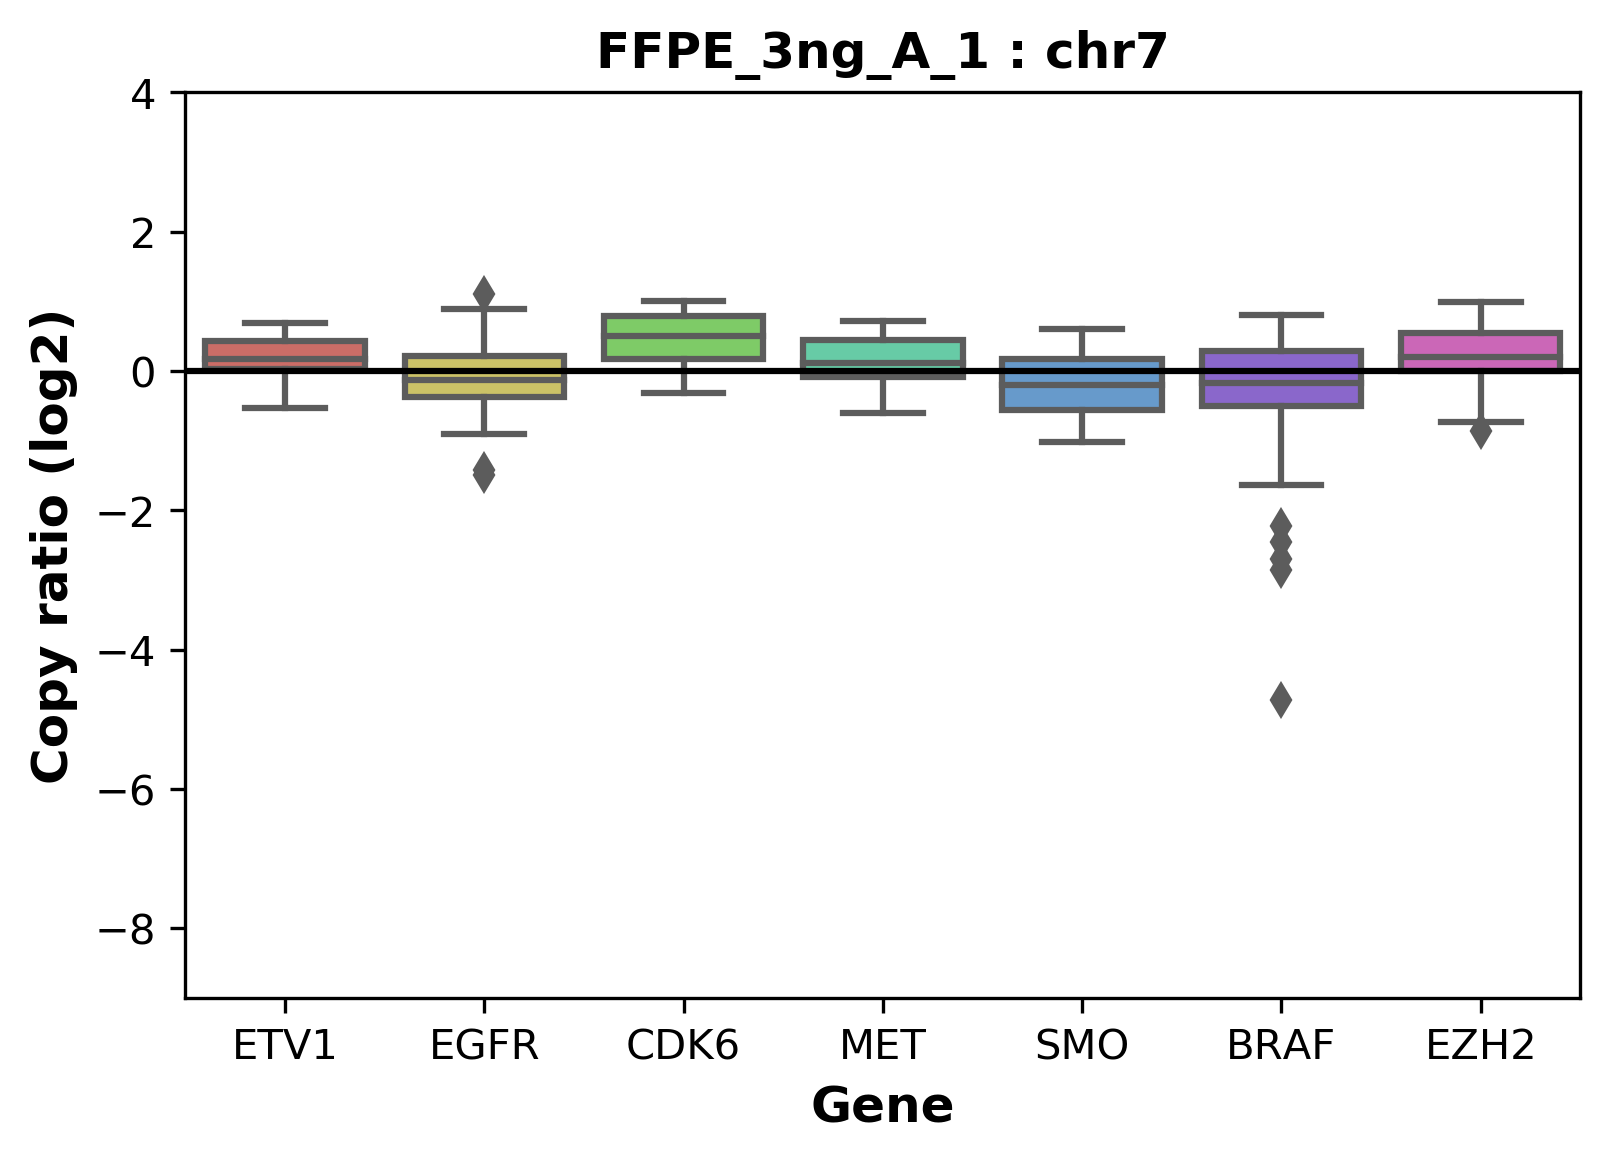

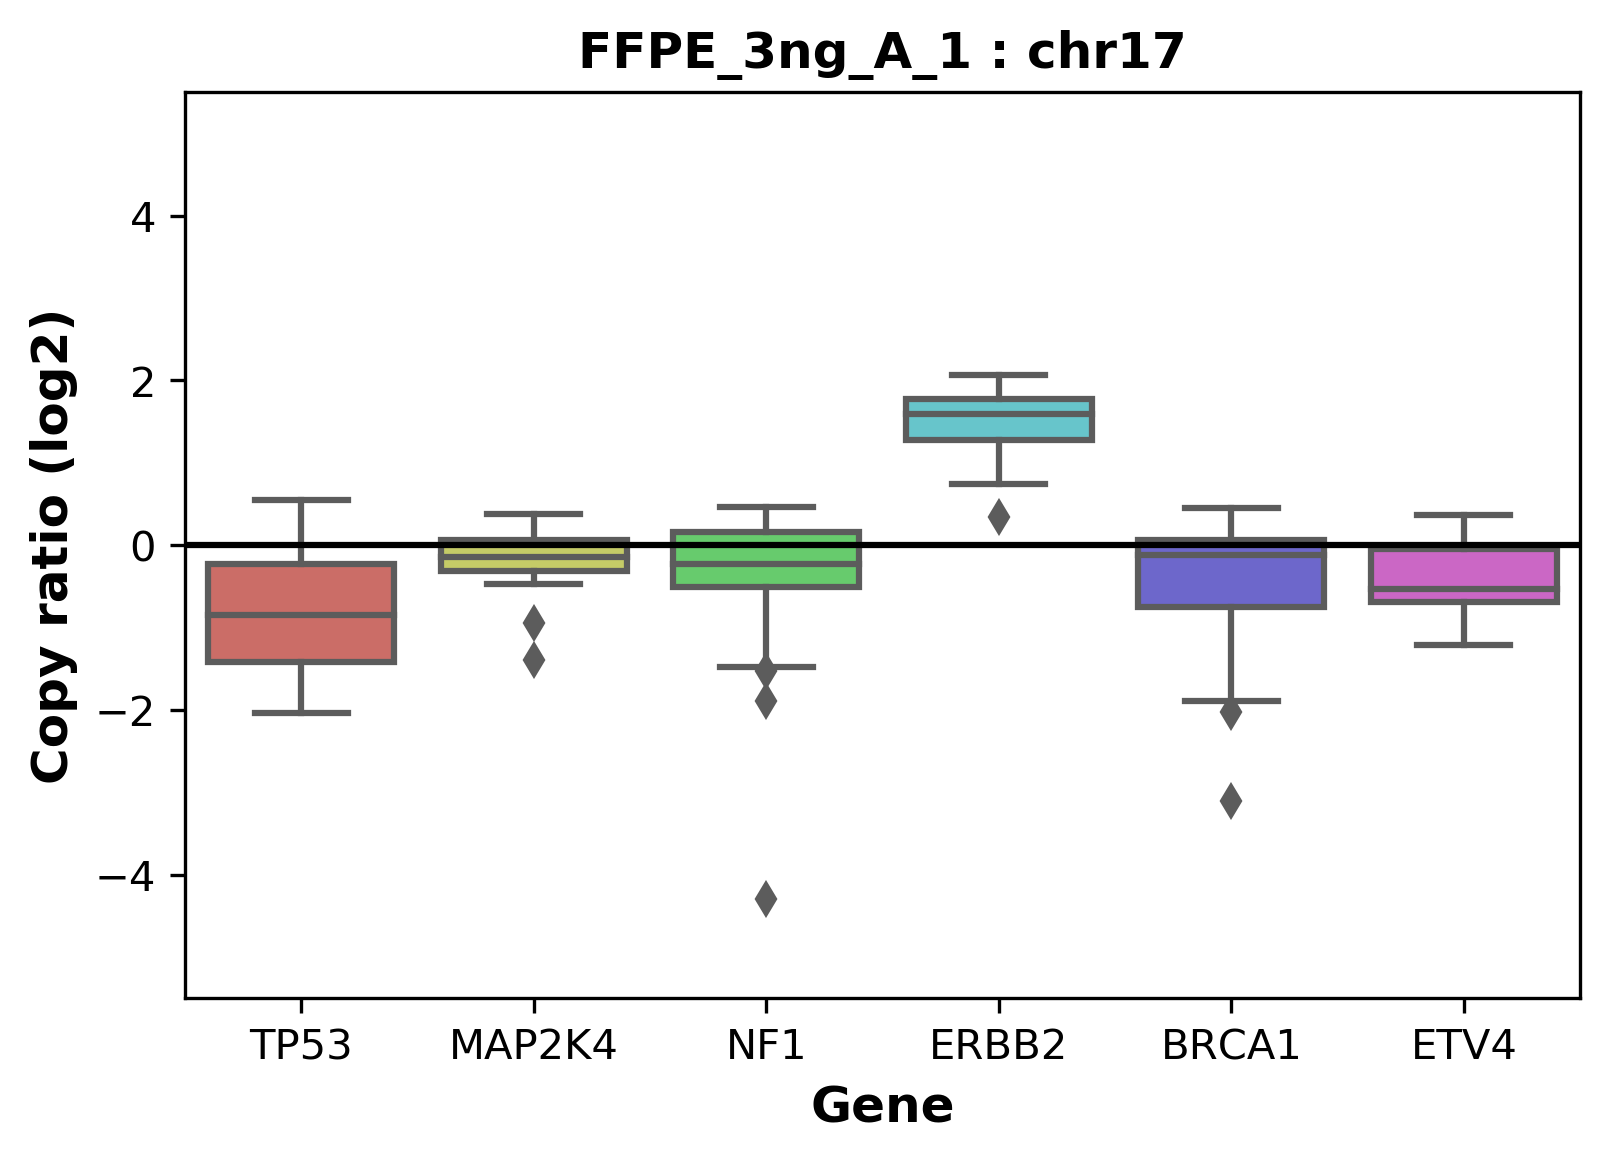

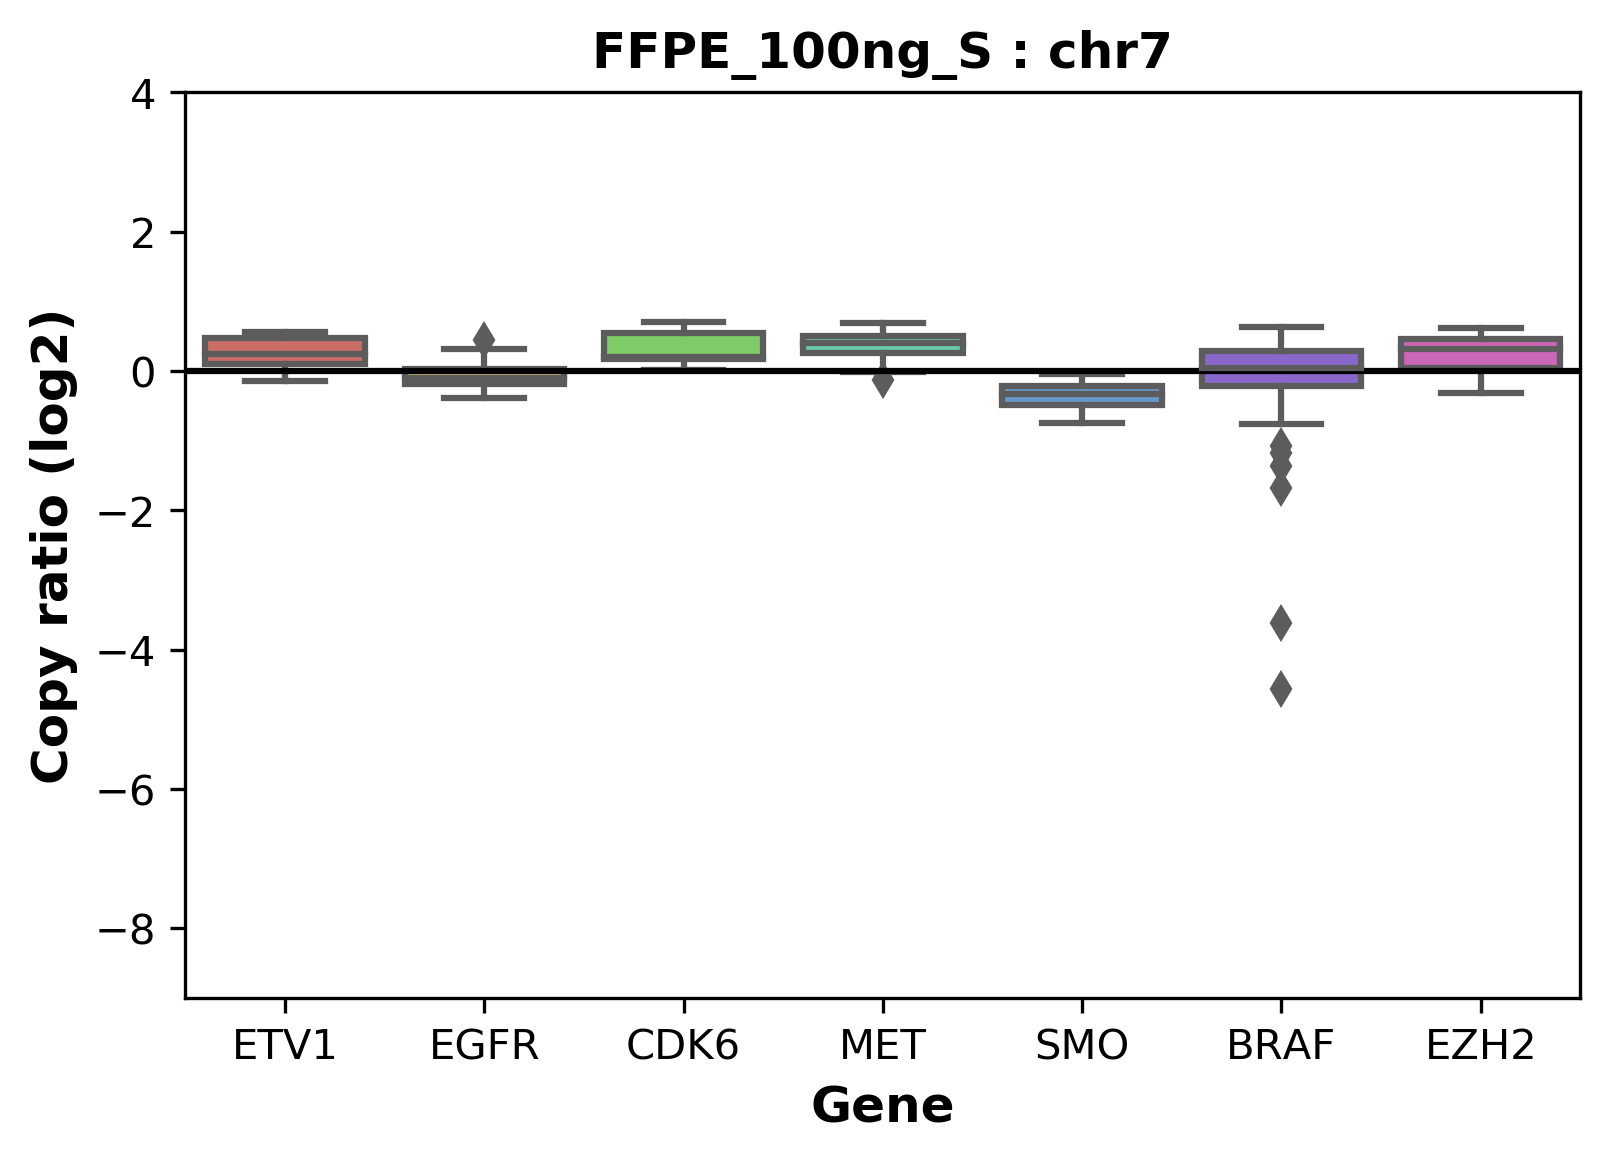

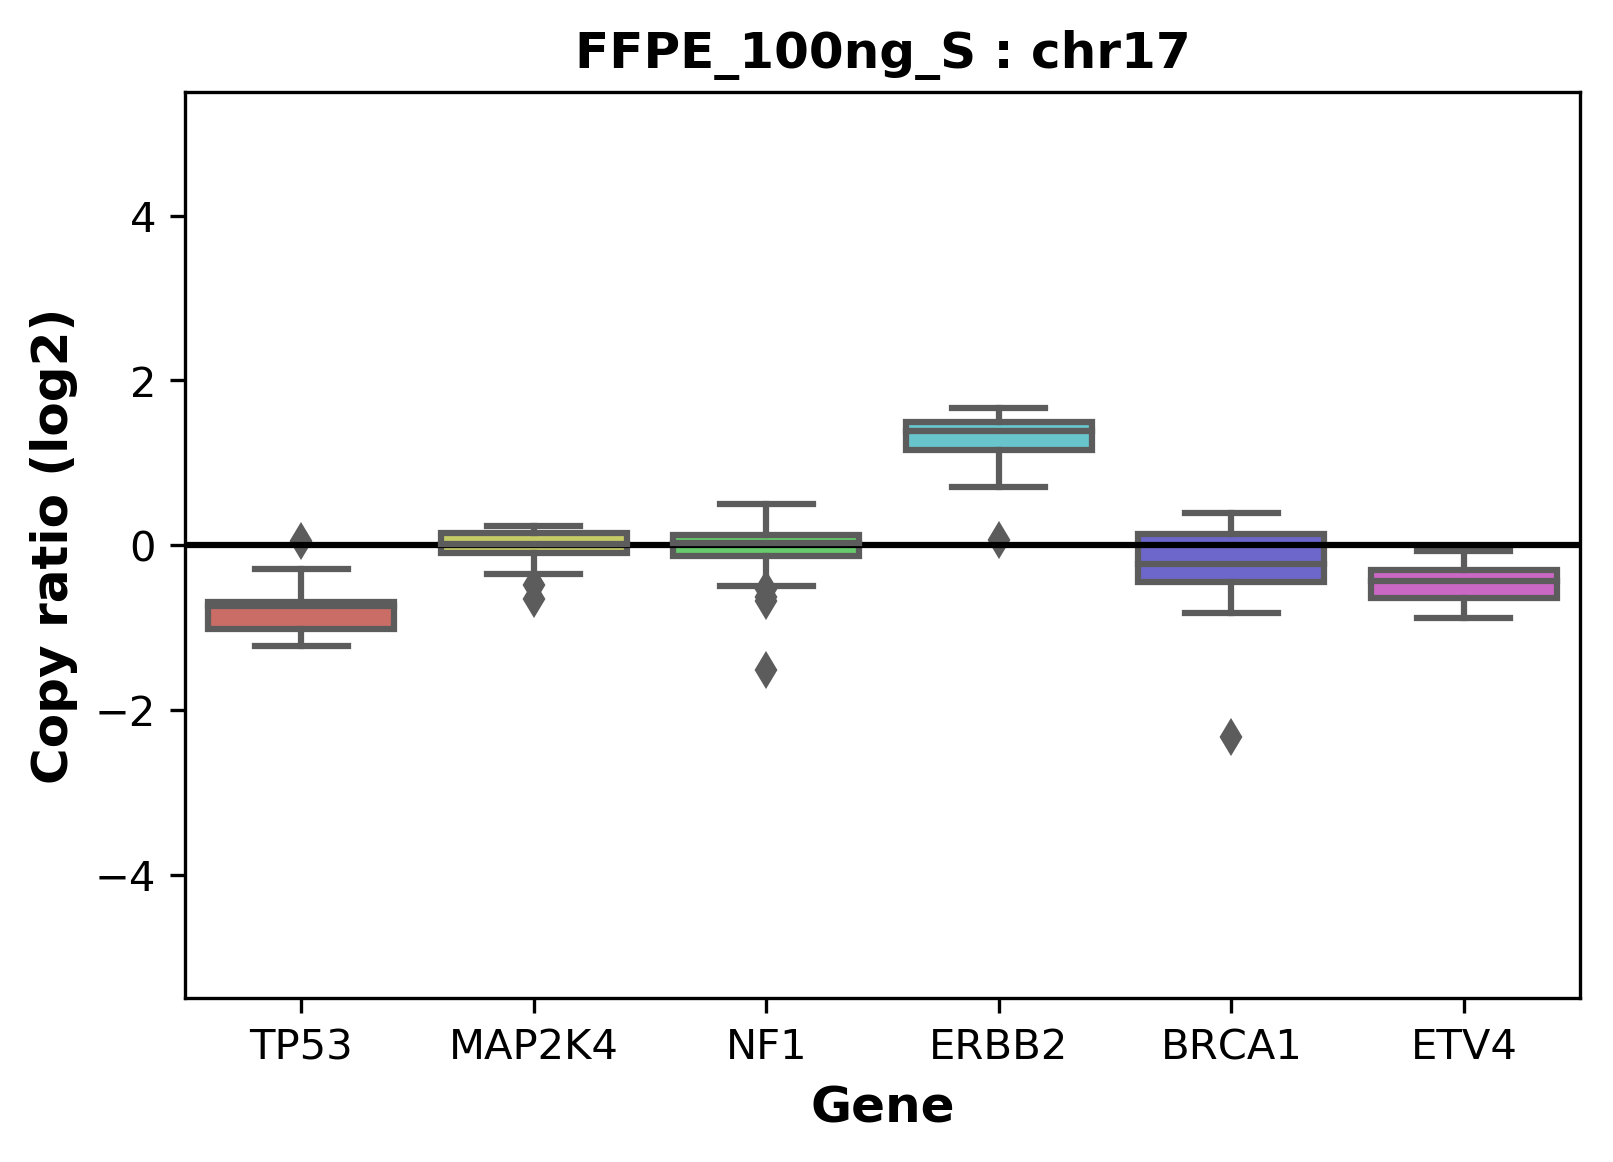

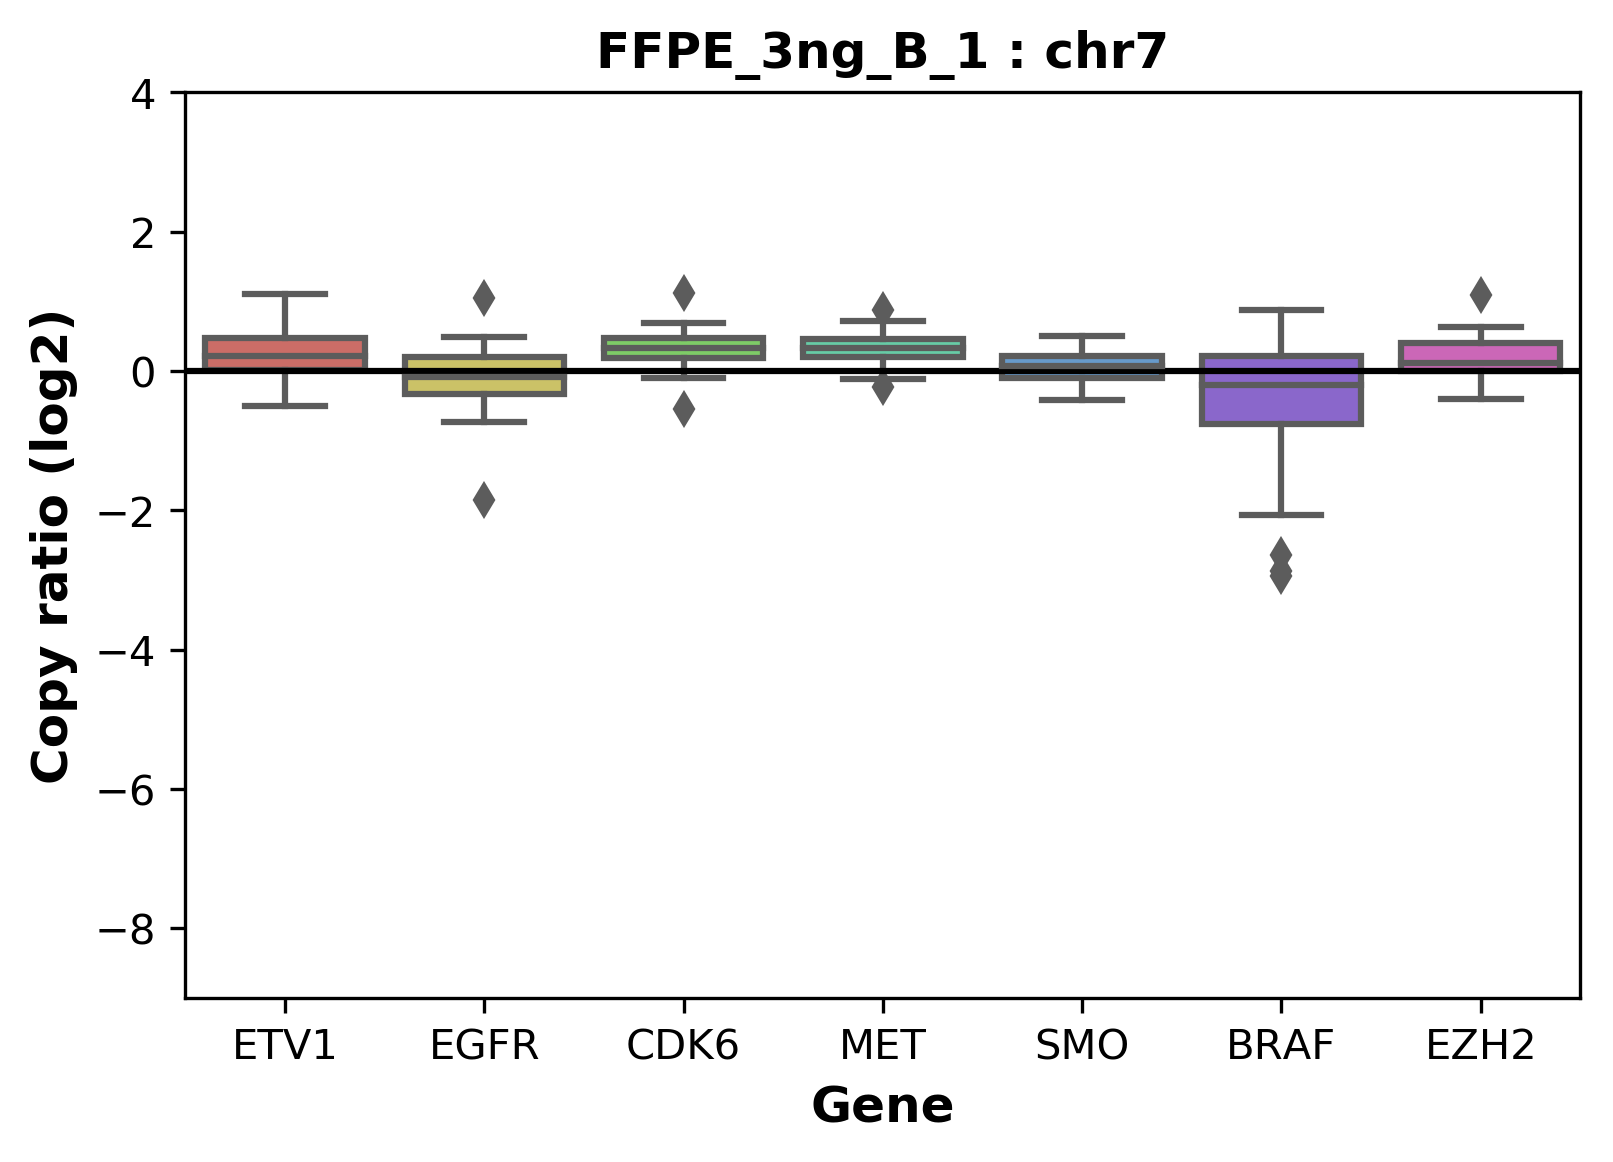

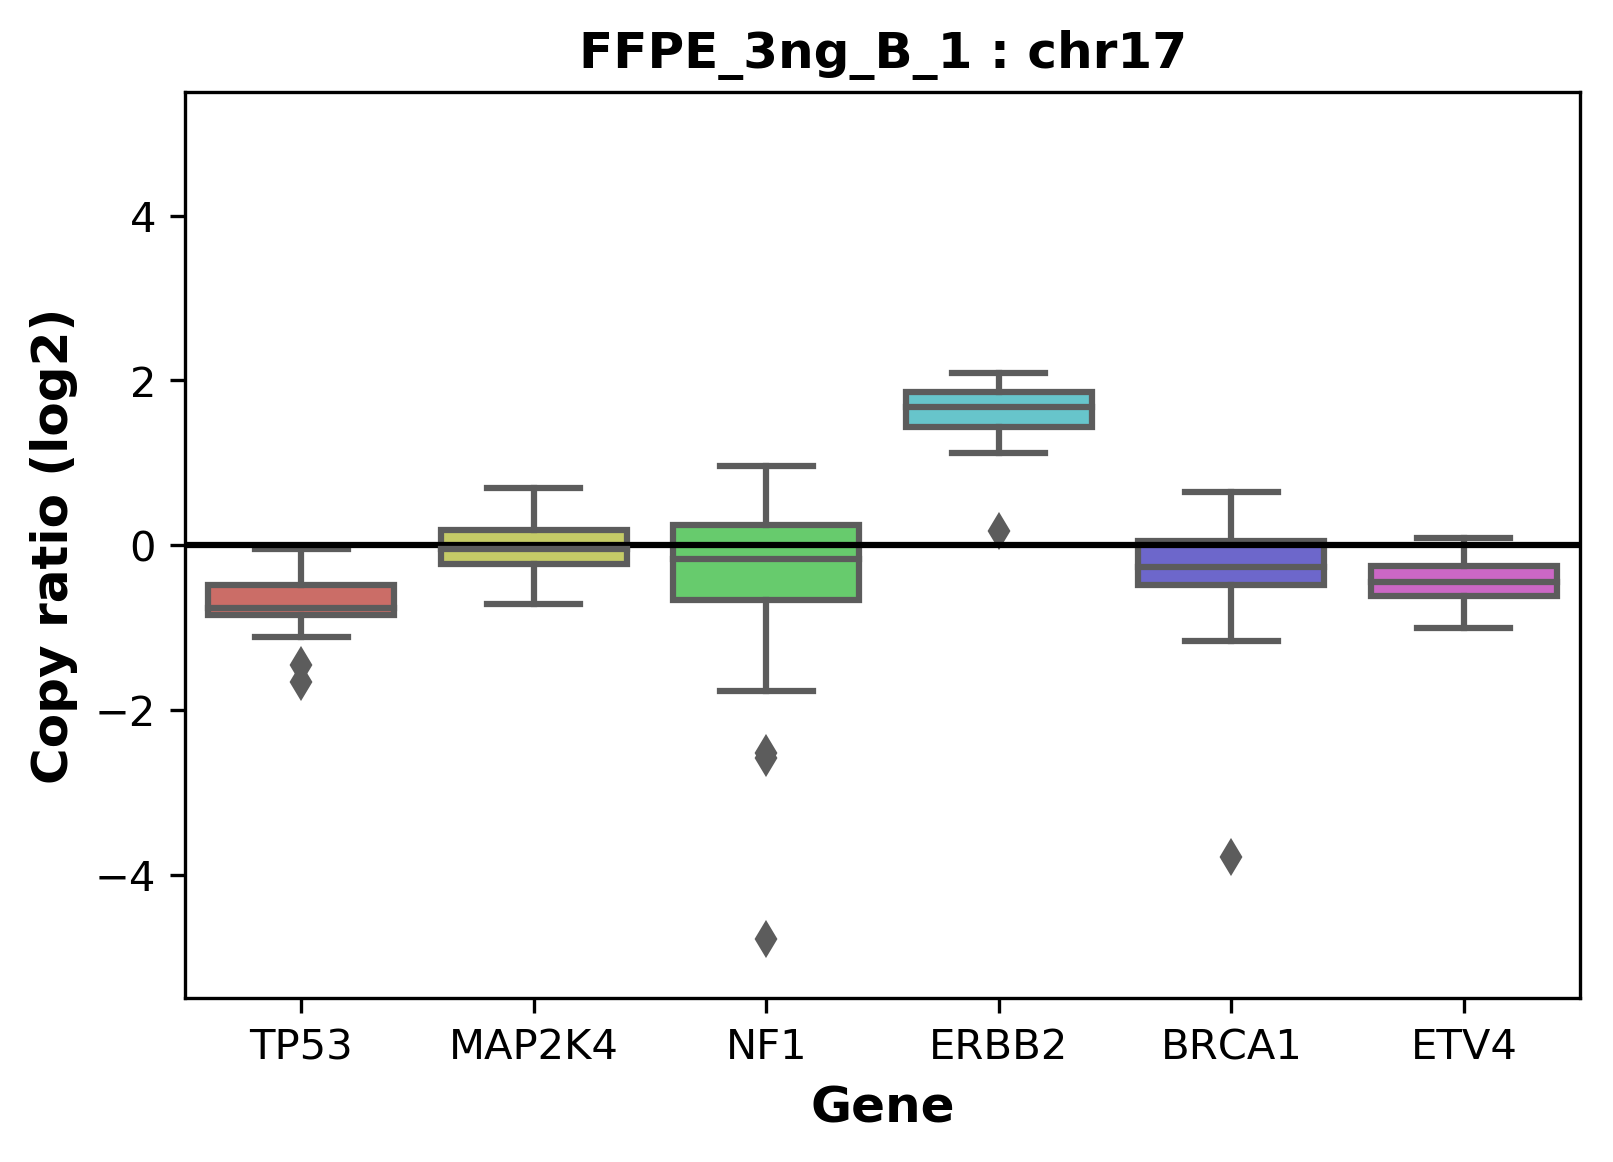

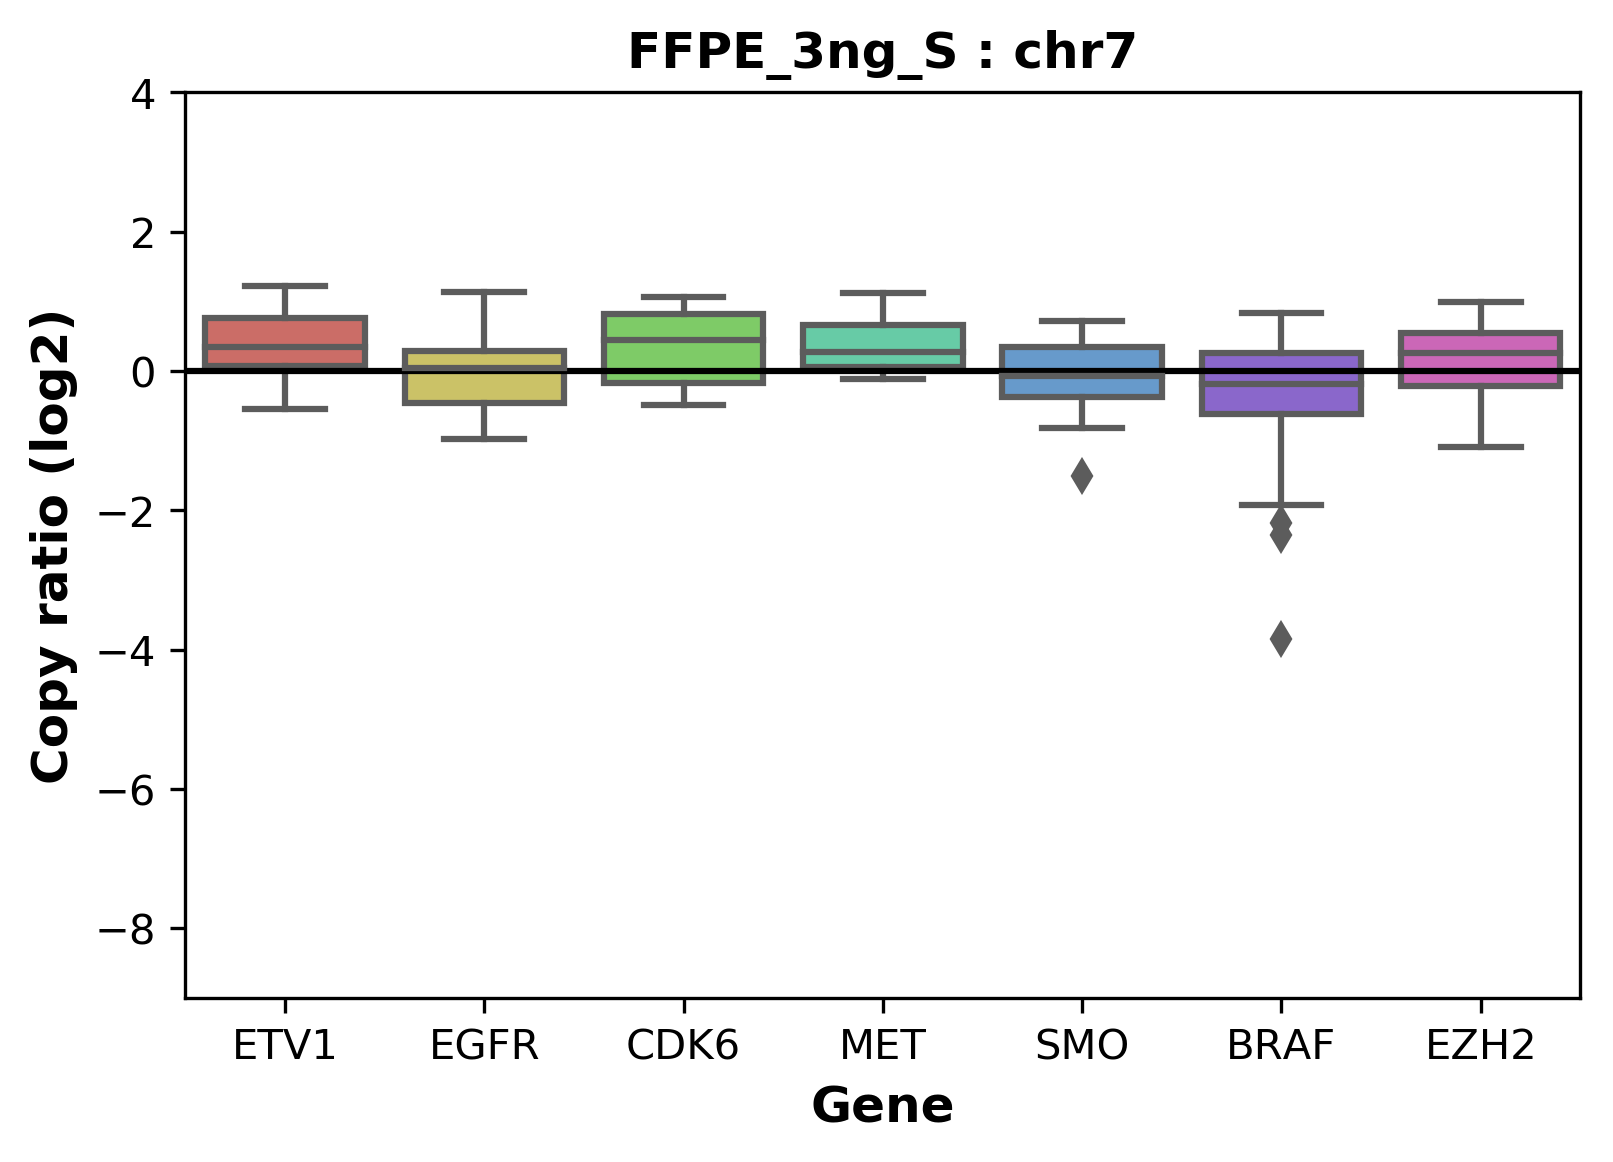

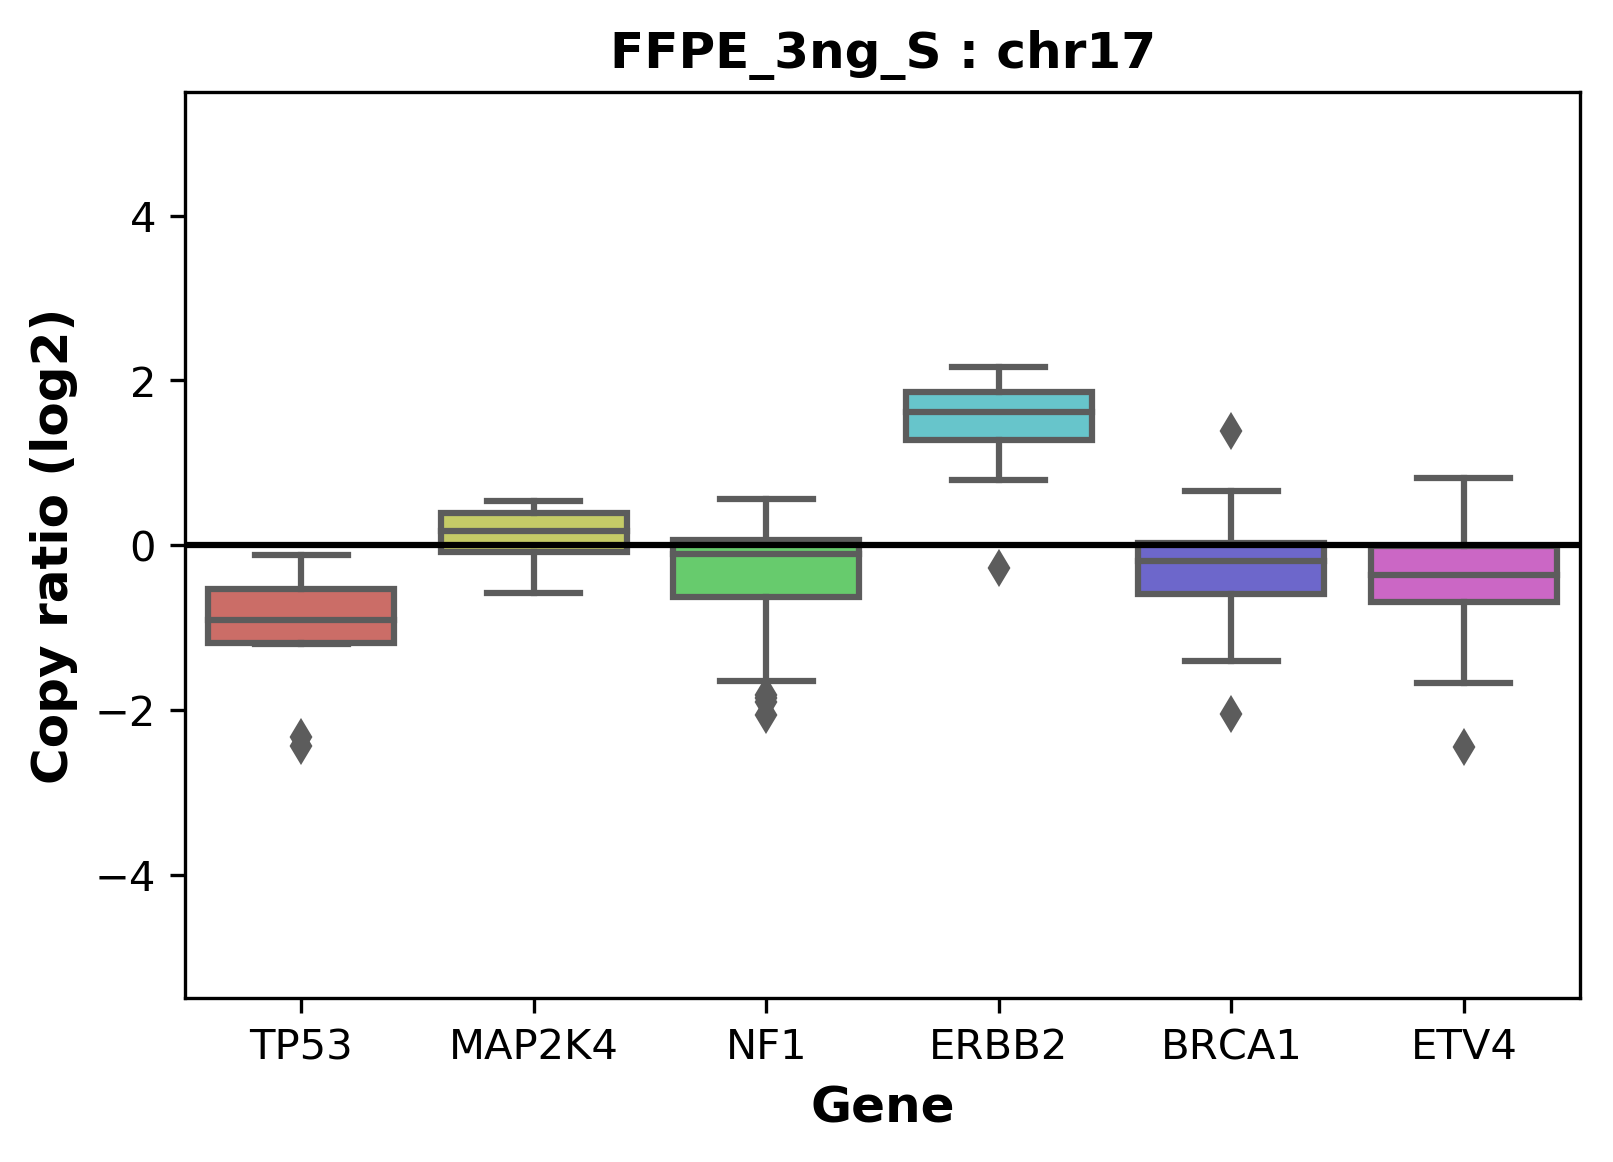

In [73]:
for filename in glob.iglob('../data/cna/*.sort.consensus.dedup.cnr'):
    path = Path(filename)
    sample = path.parts[-1].split('.')[0]
    data = pd.read_table(path)
    data = data[data['log2'] > -15]
    data = data[~data['gene'].str.startswith('chr')]
    data = data[data['gene'] != 'Antitarget']
    data['gene'] = [i.strip('.').strip(',') for i in data['gene']]
    for i in [7,17]:
        if i == 7:
            lim=(-9,4)
        else:
            lim=(-5.5,5.5)
        d = data[data['chromosome'] == 'chr' + str(i)]
        sns.boxplot(d['gene'],d['log2'],palette='hls')
        plt.ylim(lim[0],lim[1])
        plt.axhline(y=0,c='k')
        plt.title('{} : chr{}'.format(sample_names[sample],str(i)),fontsize=12,fontweight='bold')
        plt.xlabel('Gene',fontsize=12,fontweight='bold')
        plt.ylabel('Copy ratio (log2)',fontsize=12,fontweight='bold')
        plt.show()